# PRCP-1000-ProtugeseBank

## Statement :
The project involves analyzing data from direct phone call marketing campaigns conducted by a Portuguese banking institution and developing a predictive model to identify potential customers for a product.

## Aim of Project :
The primary aim of this project is to optimize the bank's marketing efforts by leveraging data-driven insights and predictive modeling techniques to identify and target customers with a higher likelihood of purchasing the product, ultimately improving campaign effectiveness and maximizing return on investment (ROI).

### Import basic Libraries

In [1]:
#importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Load Dataset

In [2]:
df = pd.read_csv( r'D:\Projects\Data\ProtugeseBank\bank.csv')
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no


###  EDA

In [3]:
#LIST OF COLUMNS

list(df.columns)

['age',
 'job',
 'marital',
 'education',
 'default',
 'balance',
 'housing',
 'loan',
 'contact',
 'day',
 'month',
 'duration',
 'campaign',
 'pdays',
 'previous',
 'poutcome',
 'y']

## EXPLANATION OF THE COLUMNS:

   ## CUSTOMER ATTRIBUTES:

01. age       : Age of the customer. 
02. job       : Type of Job the customer is in.
03. marital   : Marital Status of the customer.
04. education : Education Level of the customer.
05. default   : Did the customer defaulted any loan repayment.
06. balance   : Customer Balance Amount with the bank.
07. housing   : Do the customer has housing loan?
08. loan      : Do the customer has personal loan?

    CAMPAIGN ATTRIBUTES:
----------------------------------------------------------------------------------------------

09. contact   : Mode of communication made with the customer.
10. day       : Last contacted day of the month made with the customer.
11. month     : Last contacted month of the year made with the customer.
12. duration  : Last contact duration in seconds made with the customer.
13. campaign  : Number of contacts performed during this campaign and for this customer.
14. deposit   : Has the customer subscribed to the Fixed Deposit.

    ABOUT PREVIOUS CONTACTS/CAMPAIGN:
----------------------------------------------------------------------------------------------

15. pdays     : Number of days that passed by after the customer was last contacted from a previous campaign
16. previous  : Number of contacts performed before this campaign and for this customer.
17. poutcome  : Outcome of the previous marketing campaign.

In [4]:
# SHAPE OF THE DATASET

Total_Col = len(df.axes[1])
Total_Rows = len(df.axes[0])

print("Total Number of Rows = {} and Total Number of Columns = {}".format(Total_Rows,Total_Col))

Total Number of Rows = 4521 and Total Number of Columns = 17


In [5]:
## client subscribed a term deposit? (binary: 'yes','no') as it is y in the data renaming the particular columns 
df.rename(columns={'y': 'deposit'}, inplace=True)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4521 entries, 0 to 4520
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        4521 non-null   int64 
 1   job        4521 non-null   object
 2   marital    4521 non-null   object
 3   education  4521 non-null   object
 4   default    4521 non-null   object
 5   balance    4521 non-null   int64 
 6   housing    4521 non-null   object
 7   loan       4521 non-null   object
 8   contact    4521 non-null   object
 9   day        4521 non-null   int64 
 10  month      4521 non-null   object
 11  duration   4521 non-null   int64 
 12  campaign   4521 non-null   int64 
 13  pdays      4521 non-null   int64 
 14  previous   4521 non-null   int64 
 15  poutcome   4521 non-null   object
 16  deposit    4521 non-null   object
dtypes: int64(7), object(10)
memory usage: 600.6+ KB


The DataFrame contains a mix of numerical (int64) and categorical (object) columns.
There are no missing values (non-null count is equal to the total number of entries).
The age, balance, day, duration, campaign, pdays, and previous columns are numerical, while the rest are categorical.
The categorical columns include job, marital, education, default, housing, loan, contact, month, poutcome, and y.

In [7]:
# LIST OF UNIQUE VALUES OF COLUMNS WHERE DATATYPE IS AN OBJECT

df_new = df.select_dtypes(include = 'object')
for i in df_new:
    print("Column Name: ",i)
    print(list(df_new[i].unique()))

Column Name:  job
['unemployed', 'services', 'management', 'blue-collar', 'self-employed', 'technician', 'entrepreneur', 'admin.', 'student', 'housemaid', 'retired', 'unknown']
Column Name:  marital
['married', 'single', 'divorced']
Column Name:  education
['primary', 'secondary', 'tertiary', 'unknown']
Column Name:  default
['no', 'yes']
Column Name:  housing
['no', 'yes']
Column Name:  loan
['no', 'yes']
Column Name:  contact
['cellular', 'unknown', 'telephone']
Column Name:  month
['oct', 'may', 'apr', 'jun', 'feb', 'aug', 'jan', 'jul', 'nov', 'sep', 'mar', 'dec']
Column Name:  poutcome
['unknown', 'failure', 'other', 'success']
Column Name:  deposit
['no', 'yes']


In [8]:
df.describe()

,age,balance,day,duration,campaign,pdays,previous
count,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000
mean,41.170095,1422.657819,15.915284,263.961292,2.793630,39.766645,0.542579
std,10.576211,3009.638142,8.247667,259.856633,3.109807,100.121124,1.693562
min,19.000000,-3313.000000,1.000000,4.000000,1.000000,-1.000000,0.000000
25%,33.000000,69.000000,9.000000,104.000000,1.000000,-1.000000,0.000000
50%,39.000000,444.000000,16.000000,185.000000,2.000000,-1.000000,0.000000
75%,49.000000,1480.000000,21.000000,329.000000,3.000000,-1.000000,0.000000
max,87.000000,71188.000000,31.000000,3025.000000,50.000000,871.000000,25.000000


#### FEW IMPORTANT POINTS FROM THE ABOVE DESCRIBE TABLE:
MEAN (AGE) =  41.23
MAX  (AGE) =  95.00
MIN  (AGE) =  18.00

MEAN (BALANCE) =  1528.53
MAX  (BALANCE) = 81204.00
MIN  (BALANCE) = -6847.00

array([[<Axes: title={'center': 'age'}>,
        <Axes: title={'center': 'balance'}>,
        <Axes: title={'center': 'day'}>],
       [<Axes: title={'center': 'duration'}>,
        <Axes: title={'center': 'campaign'}>,
        <Axes: title={'center': 'pdays'}>],
       [<Axes: title={'center': 'previous'}>, <Axes: >, <Axes: >]],
      dtype=object)

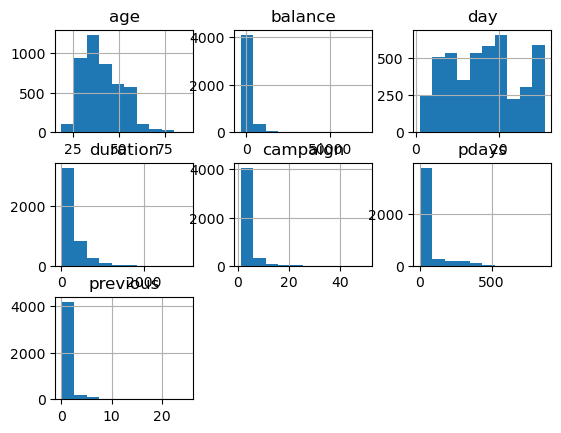

In [9]:
df.hist()

### COMPARING ALL FEATURES AGAINST DEPOSIT

Since 'deposit'( 'y') column is our response variable, we will now comapare its values with all other feature variables. Further the values in the 'deposit' columns will be looked into as 'yes' and 'no'.

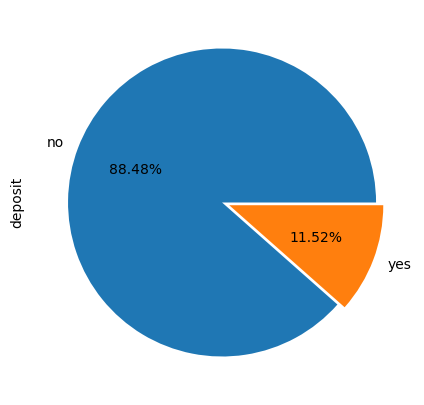

In [10]:
# NUMBER OF DEPOSITS
plt.figure(figsize=(11,5))

df['deposit'].value_counts().plot.pie(explode=[0,0.05],autopct='%1.2f%%')
shadow=True

plt.show()

In [11]:
# DEPOSIT VALUE COUNTS
df_deposit=pd.DataFrame({'YES':[5289],'NO':[5873]})
df_deposit

,YES,NO
0,5289,5873


<Axes: >

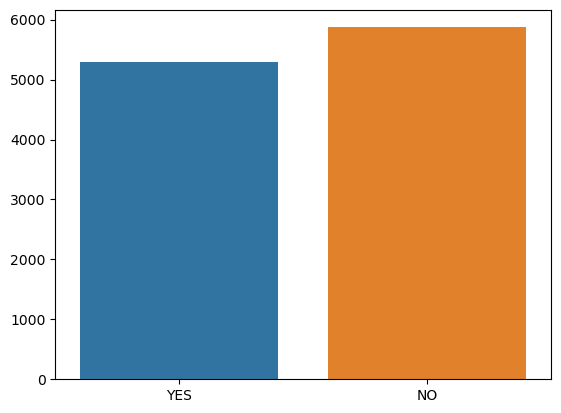

In [12]:
# DEPOSIT GRAPH REPRESENTATION

sns.barplot(data=df_deposit)

##### EXPLANATION OF THE ABOVE GRAPH:

From the above graph we can well establish that 'yes' and 'no' values are relatively close, therefore accuracy of a model will help us determine the outcome of the marketing campaign.

(array([ 43., 342., 670., 946., 566., 592., 435., 432., 321.,  85.,  22.,
         29.,  17.,  14.,   7.]),
 array([19.        , 23.53333333, 28.06666667, 32.6       , 37.13333333,
        41.66666667, 46.2       , 50.73333333, 55.26666667, 59.8       ,
        64.33333333, 68.86666667, 73.4       , 77.93333333, 82.46666667,
        87.        ]),
 <BarContainer object of 15 artists>)

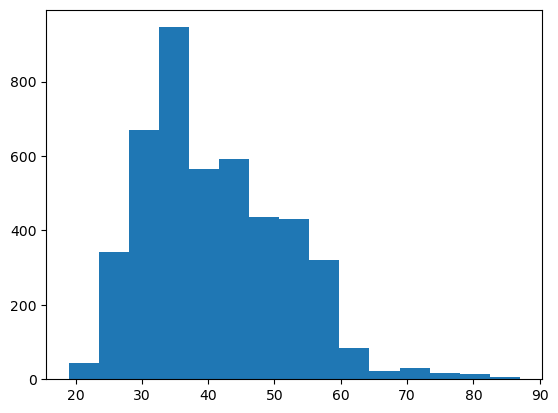

In [13]:
# AGE FREQUENCY GRAPH REPRESENTATION

plt.hist(x='age', data=df, bins = 15)

##### EXPLANATION OF THE ABOVE GRAPH:

As you can see from the above Histograph the majority of frequency lies in between 25 and 40 years.

<Axes: >

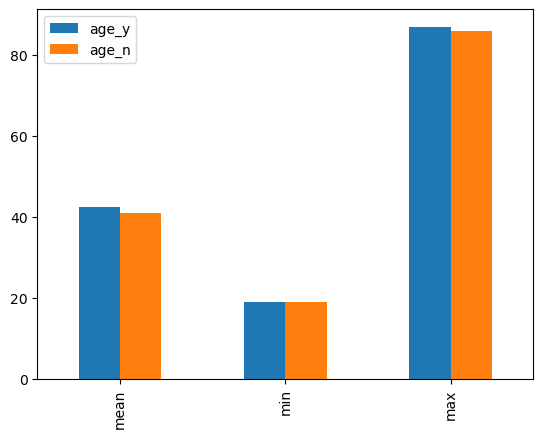

In [14]:
# DEPOSIT VS AGE

df_age = pd.DataFrame()
df_age['age_y'] = (df[df['deposit'] == 'yes'][['deposit','age']].describe())['age']
df_age['age_n'] = (df[df['deposit'] == 'no'][['deposit','age']].describe())['age']

df_age.drop(['count','std', '25%', '50%', '75%']).plot.bar()

##### EXPLANATION OF THE ABOVE

Customers with higher age group are more inclined towards a term deposit.

In [15]:
# Deposit VS JOB
pd.crosstab(df['job'],df['deposit']).style.background_gradient(cmap='winter')

deposit,no,yes
job,,
admin.,420,58
blue-collar,877,69
entrepreneur,153,15
housemaid,98,14
management,838,131
retired,176,54
self-employed,163,20
services,379,38
student,65,19


<Axes: xlabel='job', ylabel='count'>

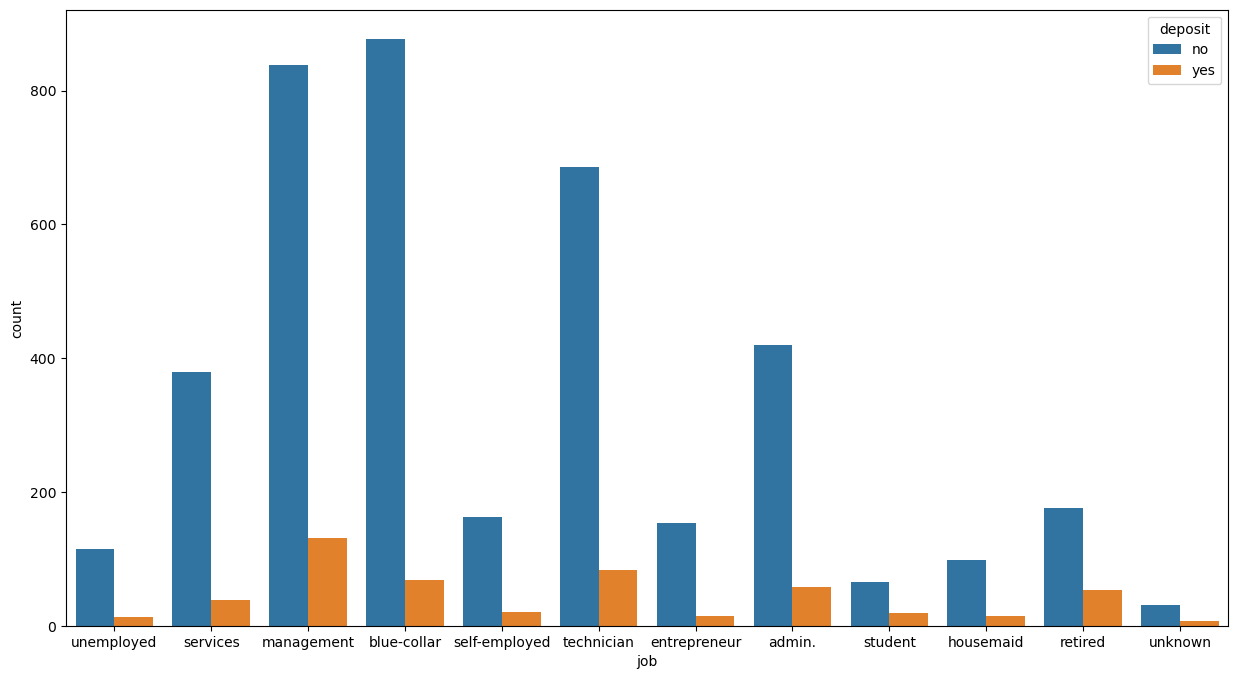

In [16]:
plt.figure(figsize=(15,8))
sns.countplot(x=df['job'],hue=df['deposit'])

##### EXPLANATION OF THE ABOVE

Customers with management profile and students are more inclined towards a term deposit.

In [17]:
# Deposit VS MARITAL

pd.crosstab(df['marital'],df['deposit']).style.background_gradient(cmap='spring')

deposit,no,yes
marital,,
divorced,451,77
married,2520,277
single,1029,167


<Axes: xlabel='marital', ylabel='count'>

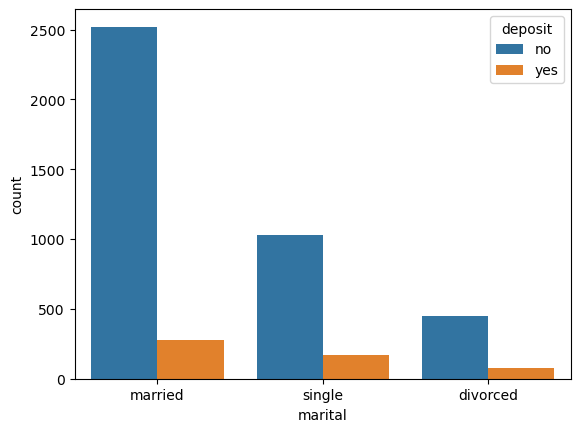

In [18]:
sns.countplot(x=df['marital'],hue=df['deposit'])

##### EXPLANATION OF THE ABOVE

Married customers are less inclined towards a term y.

In [19]:
# DEPOSIT VS EDUCATION

pd.crosstab(df['education'],df['deposit']).style.background_gradient(cmap='autumn')

deposit,no,yes
education,,
primary,614,64
secondary,2061,245
tertiary,1157,193
unknown,168,19


<Axes: xlabel='education', ylabel='count'>

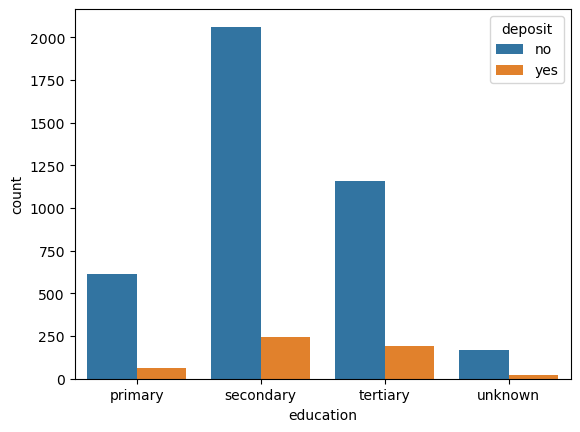

In [20]:
sns.countplot(x=df['education'],hue=df['deposit'])

##### EXPLANATION OF THE ABOVE

Customers with tertiary education background are more inclined towards a term deposit.

In [21]:
# DEPOSIT VS LOAN DEFAULT

pd.crosstab(df['default'],df['deposit']).style.background_gradient(cmap='cool')

deposit,no,yes
default,,
no,3933,512
yes,67,9


<Axes: xlabel='default', ylabel='count'>

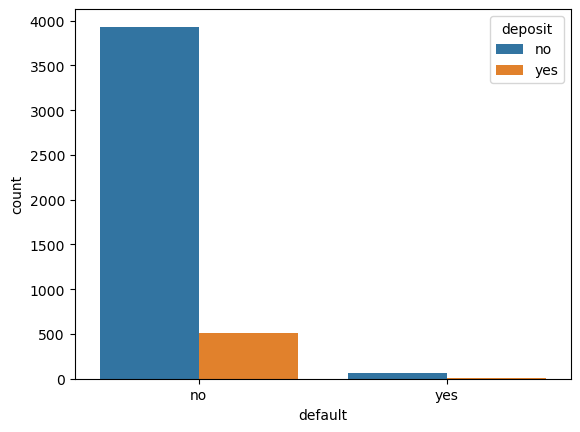

In [22]:
sns.countplot(x=df['default'],hue=df['deposit'])

##### EXPLANATION OF THE ABOVE

Defaulter customers are more reluctant towards a term deposit. 

<Axes: >

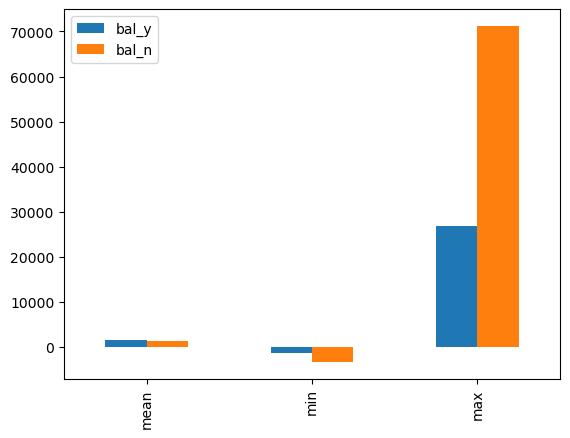

In [23]:
# DEPOSIT VS BALANCE

df_bal = pd.DataFrame()
df_bal['bal_y'] = (df[df['deposit'] == 'yes'][['deposit','balance']].describe())['balance']
df_bal['bal_n'] = (df[df['deposit'] == 'no'][['deposit','balance']].describe())['balance']

df_bal.drop(['count','std', '25%', '50%', '75%']).plot.bar()

##### EXPLANATION OF THE ABOVE

Customers with greater bank balance are more inclined towards a term deposit.

In [24]:
# DEPOSIT VS HOUSING LOAN

pd.crosstab(df['housing'],df['deposit']).style.background_gradient(cmap='Wistia')

deposit,no,yes
housing,,
no,1661,301
yes,2339,220


<Axes: xlabel='housing', ylabel='count'>

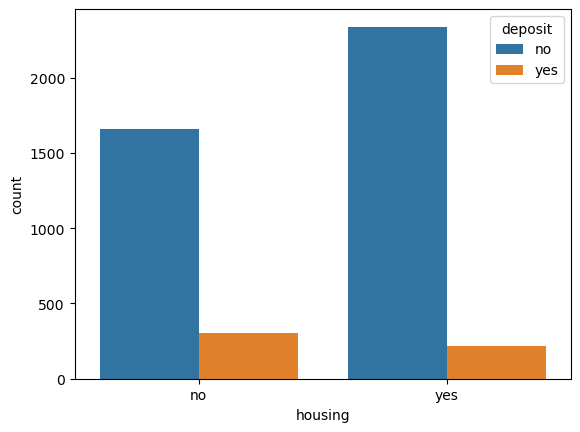

In [25]:
sns.countplot(x=df['housing'],hue=df['deposit'])

##### EXPLANATION OF THE ABOVE

Customers with no Housing loan are more inclined towards a term deposit.

In [26]:
# DEPOSIT VS PERSONAL LOAN

pd.crosstab(df['loan'],df['deposit']).style.background_gradient(cmap='bwr')

deposit,no,yes
loan,,
no,3352,478
yes,648,43


<Axes: xlabel='loan', ylabel='count'>

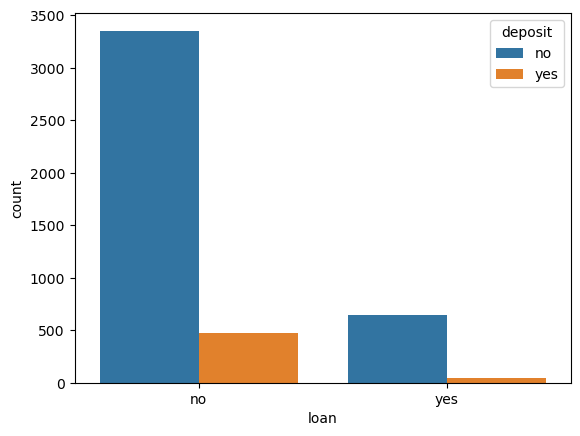

In [27]:
sns.countplot(x=df['loan'],hue=df['deposit'])


##### EXPLANATION OF THE ABOVE

Customers with no personal loan are more inclined towards a term deposit.

In [28]:
# DEPOSIT VS CONTACT

pd.crosstab(df['contact'],df['deposit']).style.background_gradient(cmap='seismic')

deposit,no,yes
contact,,
cellular,2480,416
telephone,257,44
unknown,1263,61


<Axes: xlabel='contact', ylabel='count'>

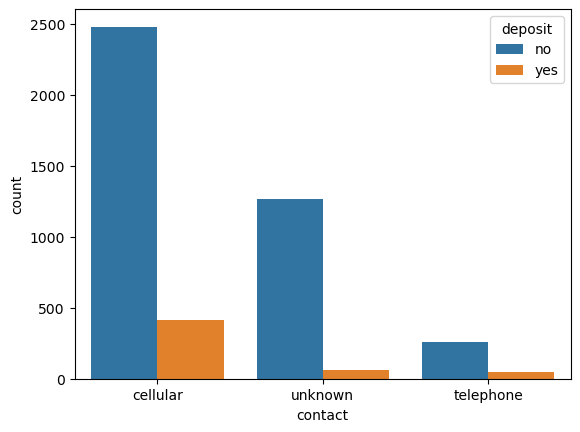

In [29]:
sns.countplot(x=df['contact'],hue=df['deposit'])

##### EXPLANATION OF THE ABOVE

Customers who were approached via 'cellular' are more inclined towards a term deposit.

<Axes: >

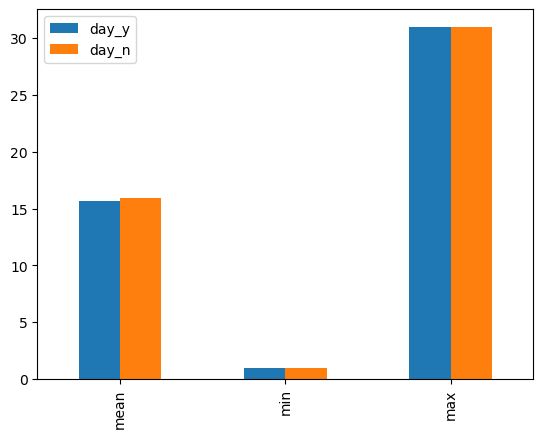

In [30]:
# DEPOSIT VS DAY

df_day = pd.DataFrame()
df_day['day_y'] = (df[df['deposit'] == 'yes'][['deposit','day']].describe())['day']
df_day['day_n'] = (df[df['deposit'] == 'no'][['deposit','day']].describe())['day']

df_day.drop(['count','std', '25%', '50%', '75%']).plot.bar()

EXPLANATION OF THE ABOVE

Customers are more reluctant towards a term deposit in the beginning of the month.

In [31]:
# DEPOSIT VS MONTH

pd.crosstab(df['month'],df['deposit']).style.background_gradient(cmap='PRGn')

deposit,no,yes
month,,
apr,237,56
aug,554,79
dec,11,9
feb,184,38
jan,132,16
jul,645,61
jun,476,55
mar,28,21
may,1305,93


<Axes: xlabel='month', ylabel='count'>

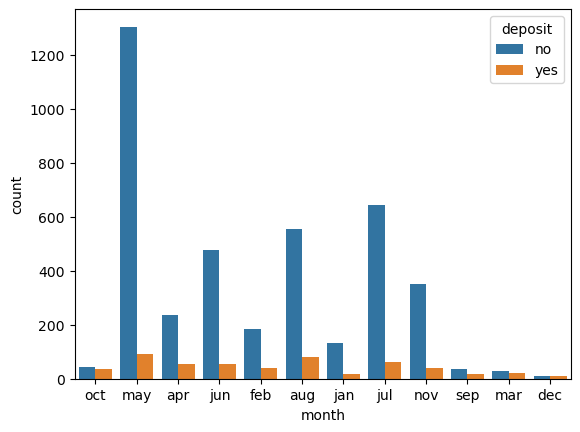

In [32]:
sns.countplot(x=df['month'],hue=df['deposit'])

##### EXPLANATION OF THE ABOVE

Customers are more reluctant towards a term deposit during the summer seasons (May to August)

<Axes: >

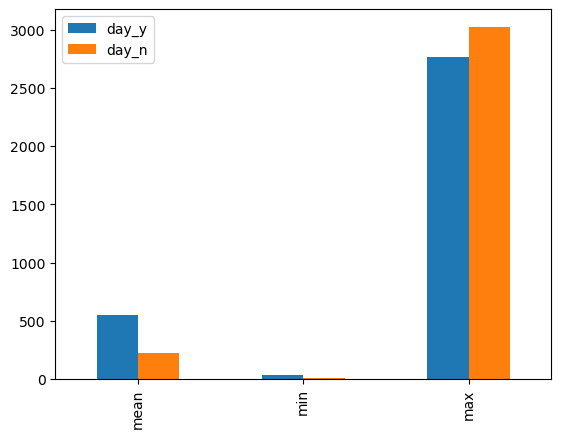

In [33]:
# DEPOSIT VS DURATION

df_dur = pd.DataFrame()
df_dur['day_y'] = (df[df['deposit'] == 'yes'][['deposit','duration']].describe())['duration']
df_dur['day_n'] = (df[df['deposit'] == 'no'][['deposit','duration']].describe())['duration']

df_dur.drop(['count','std', '25%', '50%', '75%']).plot.bar()

##### EXPLANATION OF THE ABOVE

Chances of successfully locking a customer for a term deposit substantially increase with higher duration of conversation

<Axes: >

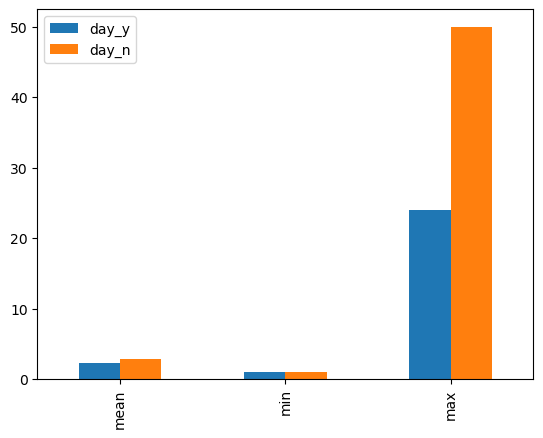

In [34]:
# DEPOSIT VS CAMPAIGN

df_camp = pd.DataFrame()
df_camp['day_y'] = (df[df['deposit'] == 'yes'][['deposit','campaign']].describe())['campaign']
df_camp['day_n'] = (df[df['deposit'] == 'no'][['deposit','campaign']].describe())['campaign']

df_camp.drop(['count','std', '25%', '50%', '75%']).plot.bar()

##### EXPLANATION OF THE ABOVE

Chances of successfully locking a customer for a term deposit decreases with more number of contacts.

<Axes: xlabel='deposit', ylabel='pdays'>

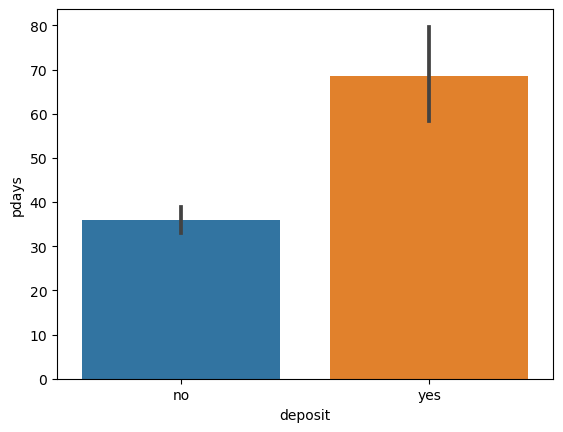

In [35]:
# DEPOSIT VS PDAYS 

sns.barplot(y=df['pdays'],x=df['deposit'])

##### EXPLANATION OF THE ABOVE

More the number of days that passed by after the customer was last contacted from a previous campaign, the customer is inclined towards term deposit

<Axes: xlabel='deposit', ylabel='previous'>

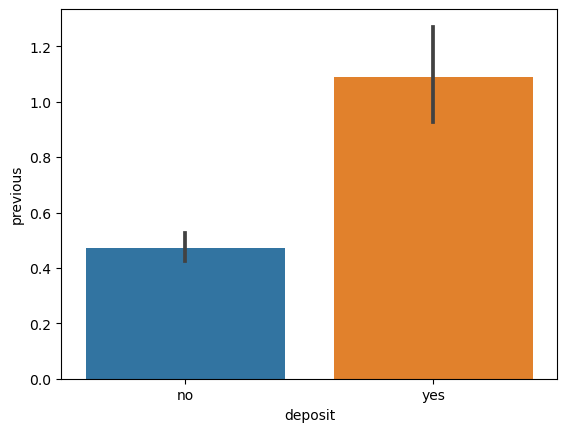

In [36]:
# DEPOSIT VS PREVIOUS

sns.barplot(y=df['previous'],x=df['deposit'])

##### EXPLANATION OF THE ABOVE

Lesser the number of contacts performed before this campaign and for this customer,  the customer is inclined towards term deposit

In [37]:
# DEPOSIT VS POUTCOME

df['poutcome']=df['poutcome'].replace(['other'], ['unknown'])
pd.crosstab(df['poutcome'],df['deposit']).style.background_gradient(cmap='PuOr')

deposit,no,yes
poutcome,,
failure,427,63
success,46,83
unknown,3527,375


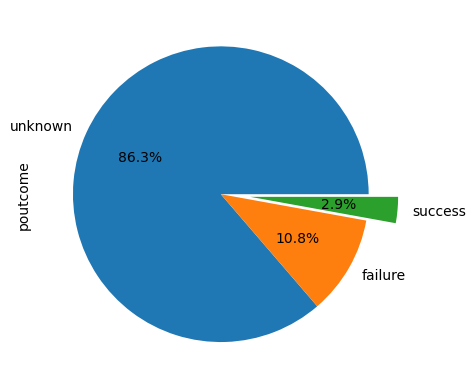

<Axes: xlabel='poutcome', ylabel='count'>

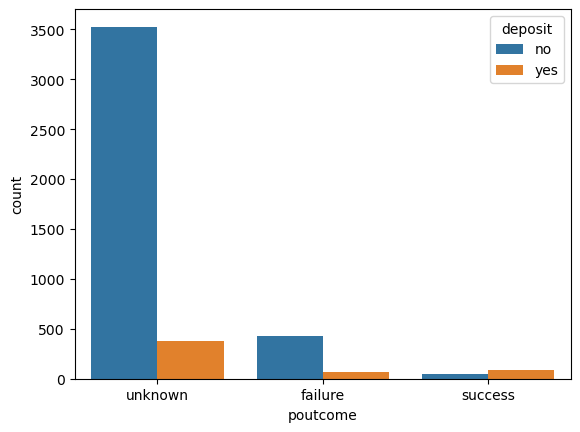

In [38]:
df['poutcome'].value_counts().plot.pie(explode=[0,0,0.2],autopct='%1.1f%%')
plt.show()
sns.countplot(x=df['poutcome'],hue=df['deposit'])

##### EXPLANATION OF THE ABOVE

Previous Campaign was 9.6% successful.

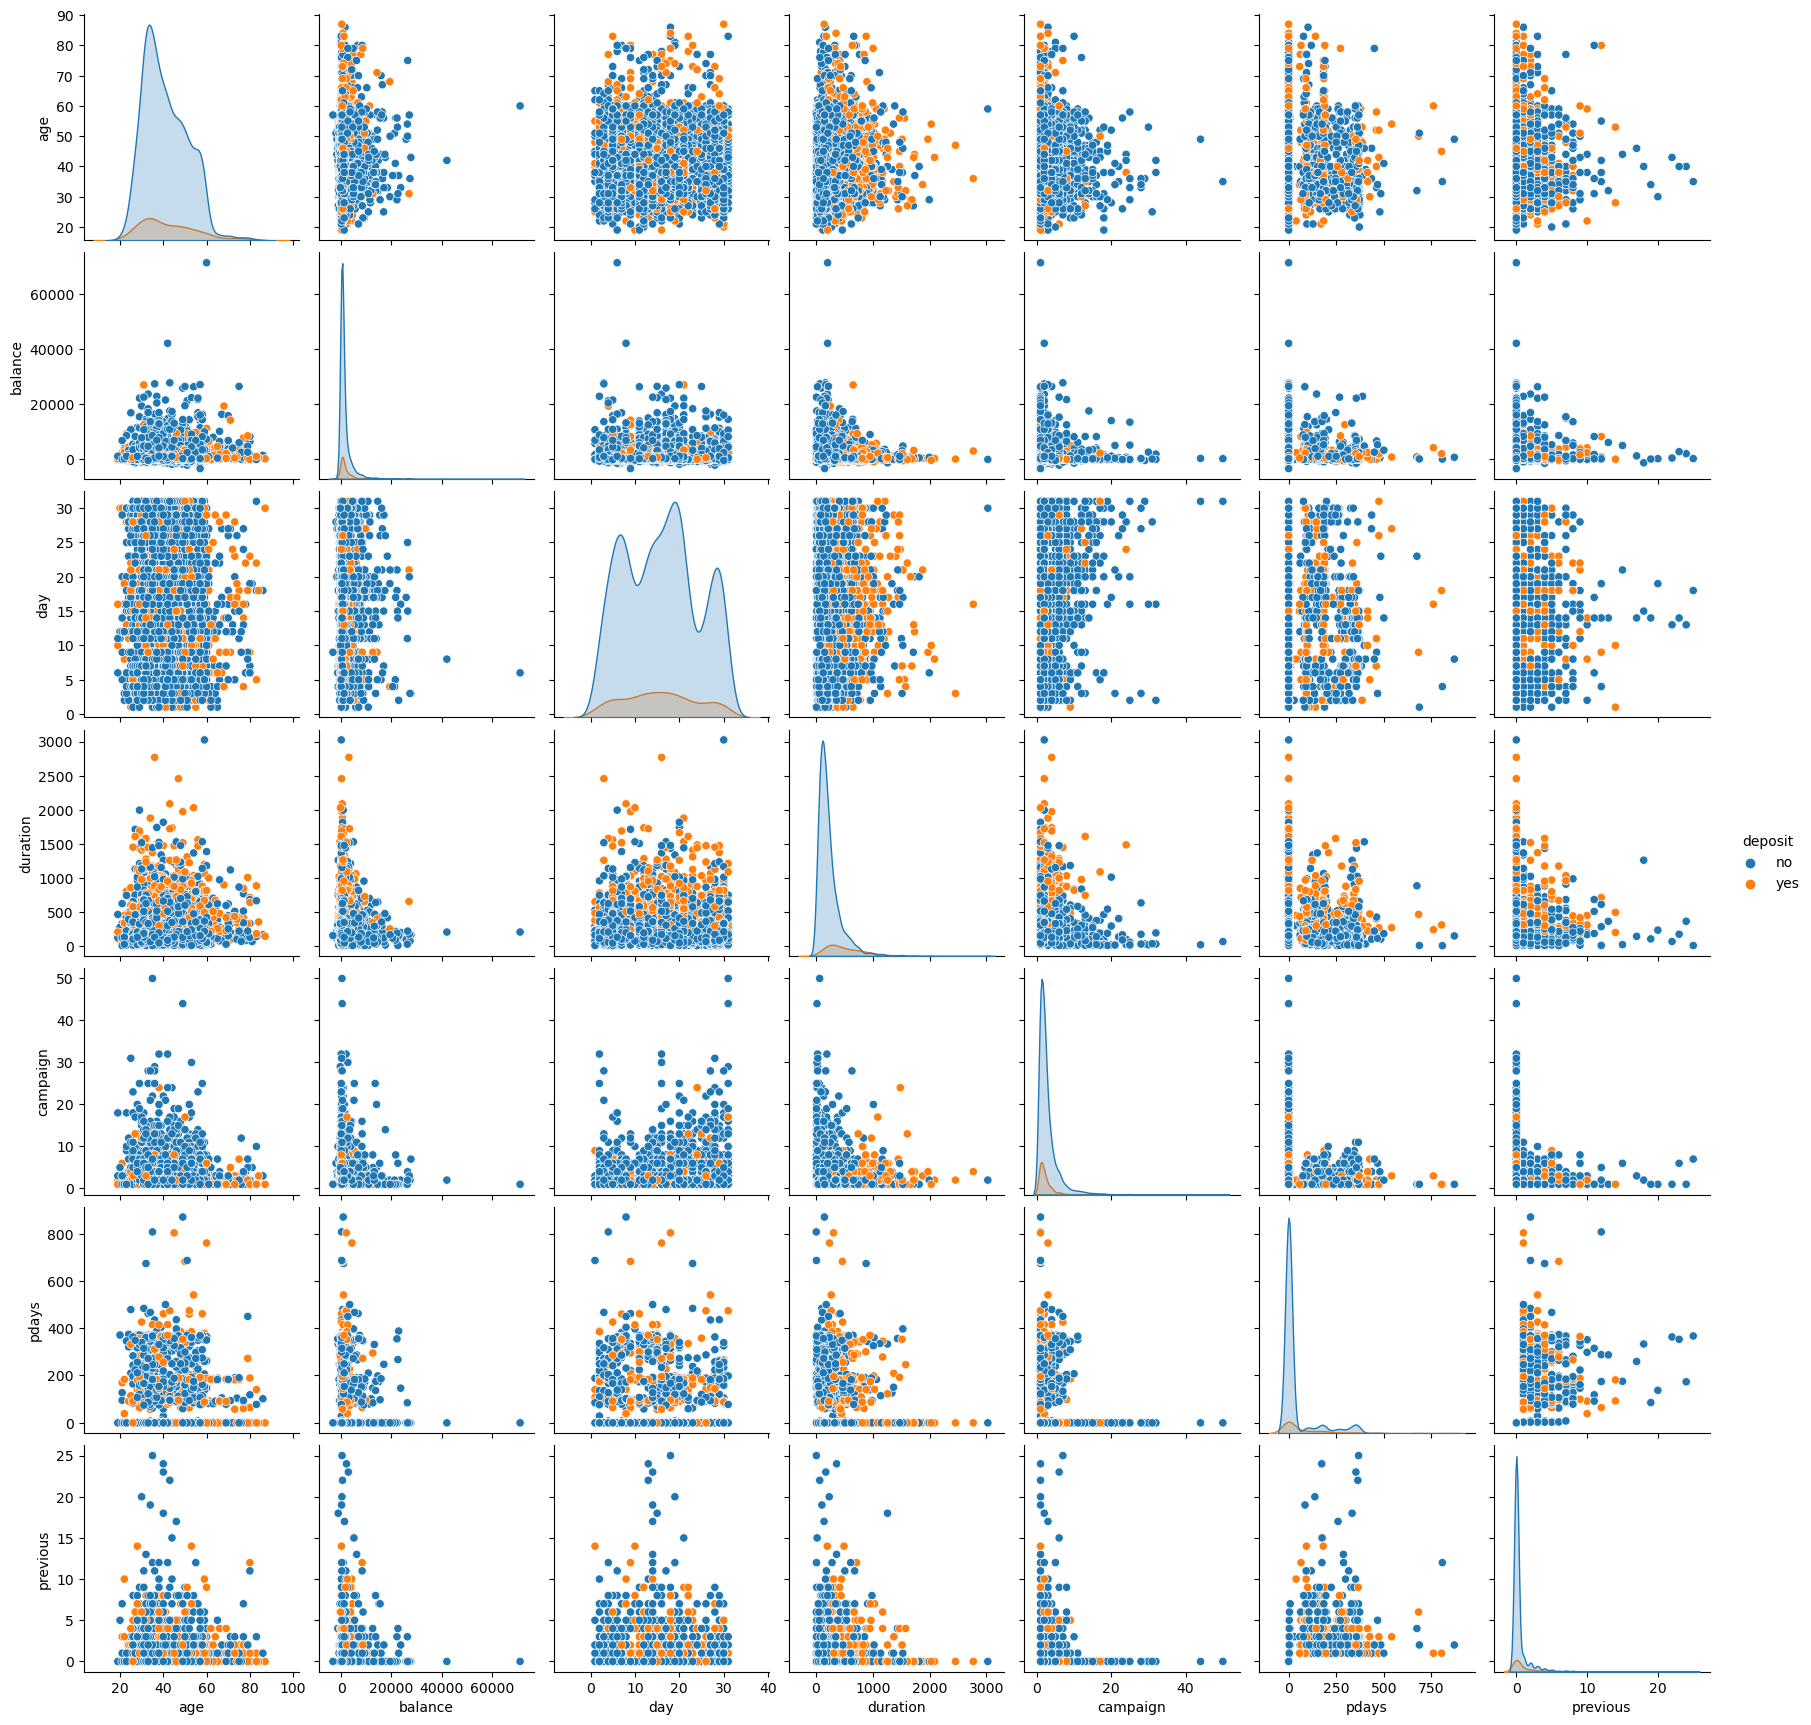

In [39]:
sns.pairplot(data=df,hue='deposit')

C:\Users\user\AppData\Local\Temp\ipykernel_29672\3370777860.py:4: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(),square=True,annot=True,cmap='twilight_shifted')


<Axes: >

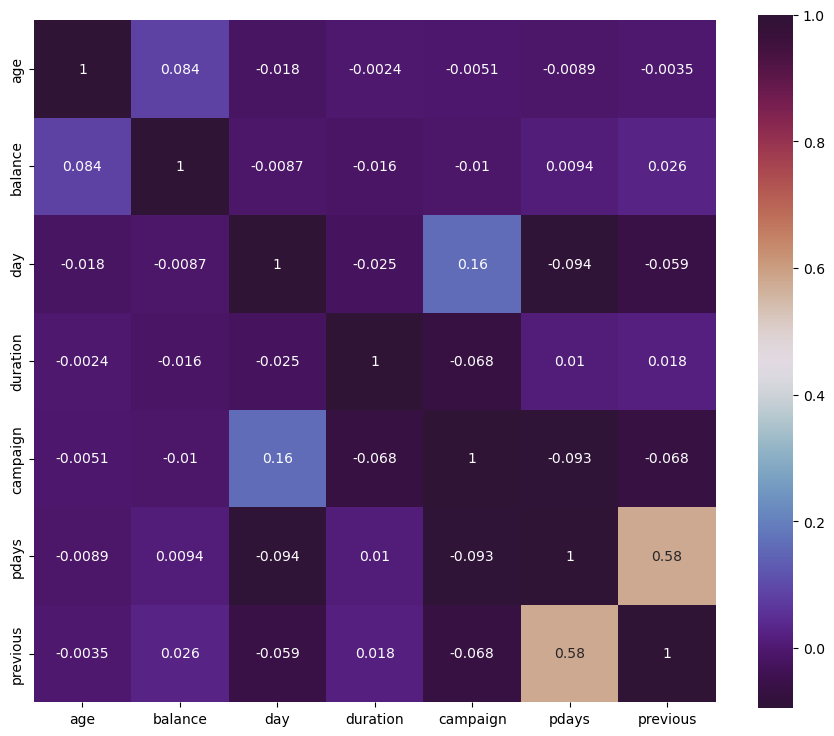

In [40]:
# CORRELATION BETWEEN THE ATTRIBUTES 
plt.figure(figsize=(11,9))

sns.heatmap(df.corr(),square=True,annot=True,cmap='twilight_shifted')

##### EXPLANATION OF THE ABOVE

As we can clearly observe that features are not much correlated. Therefore we will continue with all the features.

## DATA WRANGLING¶

In [41]:
# FINDING DUPLICATE ROWS 
df.duplicated().sum()

print("Number of duplicated rows {}".format(df.duplicated().sum()))

Number of duplicated rows 0


In [42]:
# FINDING NULL VALUES 
df.isnull().sum()

print("Number of null values in the columns:\n\n {}".format(df.isnull().sum()))

Number of null values in the columns:

 age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
deposit      0
dtype: int64


### ANALYZING THE NUMERICAL ATTRIBUTES FOR OUTLIERS¶

In [43]:
df_new = df.select_dtypes(include = 'int64')
for i in df_new:
    print("Column Name: ",i)
    #print(list(df_new[i].unique()))

Column Name:  age
Column Name:  balance
Column Name:  day
Column Name:  duration
Column Name:  campaign
Column Name:  pdays
Column Name:  previous


<Axes: xlabel='deposit', ylabel='age'>

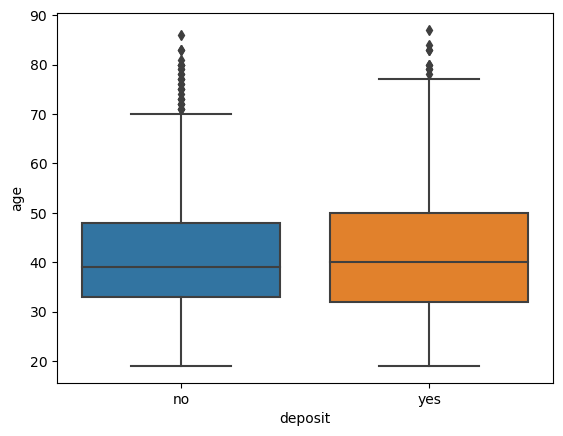

In [44]:
sns.boxplot(y=df['age'],x=df['deposit'])

<Axes: xlabel='deposit', ylabel='balance'>

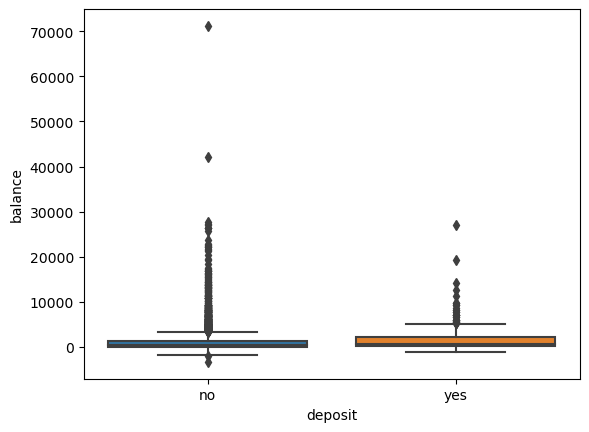

In [45]:
sns.boxplot(y=df['balance'],x=df['deposit'])

<Axes: xlabel='deposit', ylabel='day'>

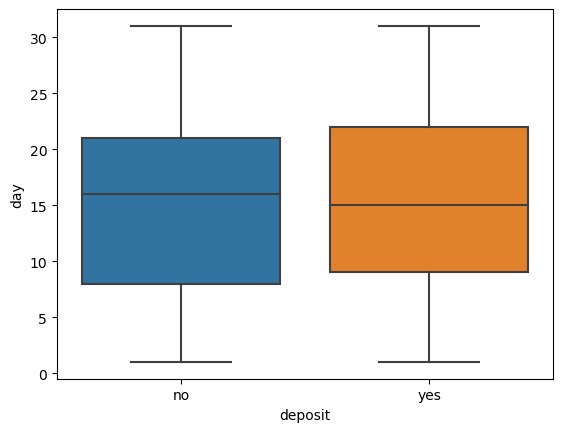

In [46]:
sns.boxplot(y=df['day'],x=df['deposit'])

<Axes: xlabel='deposit', ylabel='duration'>

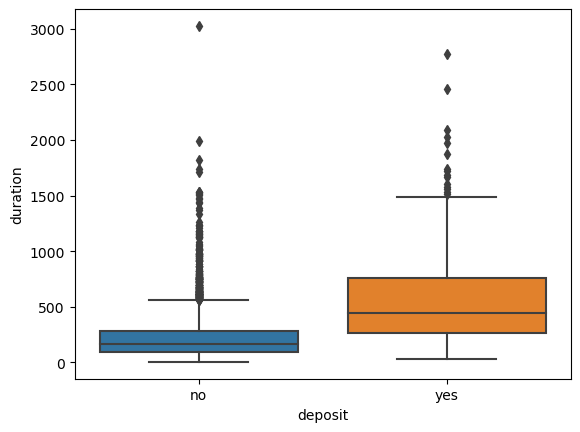

In [47]:
sns.boxplot(y=df['duration'],x=df['deposit'])

<Axes: xlabel='deposit', ylabel='campaign'>

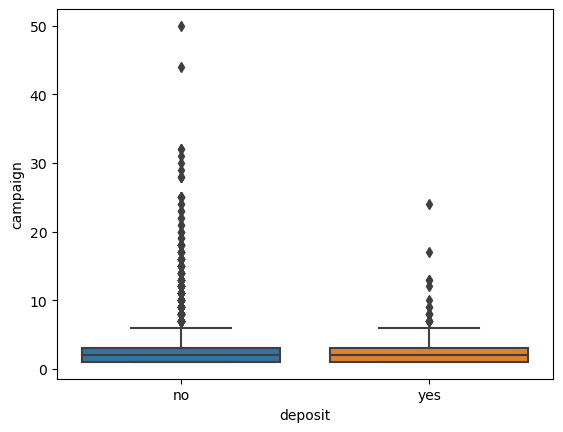

In [48]:
sns.boxplot(y=df['campaign'],x=df['deposit'])

<Axes: xlabel='deposit', ylabel='pdays'>

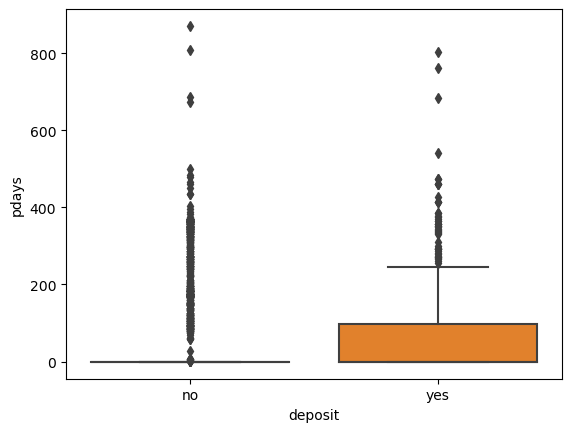

In [49]:
sns.boxplot(y=df['pdays'],x=df['deposit'])

<Axes: xlabel='deposit', ylabel='previous'>

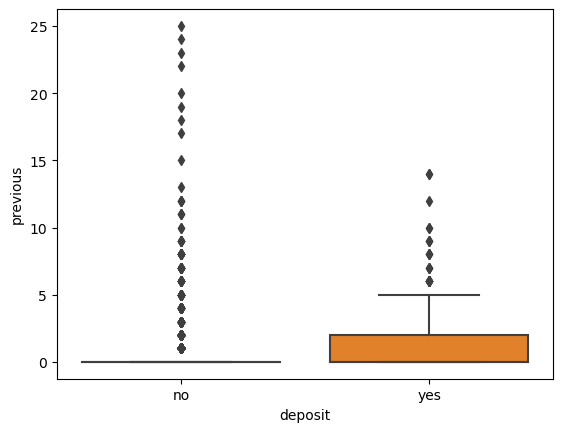

In [50]:
sns.boxplot(y=df['previous'],x=df['deposit'])

##### EXPLANATION OF THE ABOVE

Based on the above shown BoxPlots we can clearly see that except 'day' feature all other features have some anomalies, so we will investigate these attributes further.

### FURTHER INVESTIGATION..

In [51]:
df[['age','balance','day','duration','campaign','pdays','previous']].describe()

,age,balance,day,duration,campaign,pdays,previous
count,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000
mean,41.170095,1422.657819,15.915284,263.961292,2.793630,39.766645,0.542579
std,10.576211,3009.638142,8.247667,259.856633,3.109807,100.121124,1.693562
min,19.000000,-3313.000000,1.000000,4.000000,1.000000,-1.000000,0.000000
25%,33.000000,69.000000,9.000000,104.000000,1.000000,-1.000000,0.000000
50%,39.000000,444.000000,16.000000,185.000000,2.000000,-1.000000,0.000000
75%,49.000000,1480.000000,21.000000,329.000000,3.000000,-1.000000,0.000000
max,87.000000,71188.000000,31.000000,3025.000000,50.000000,871.000000,25.000000


EXPLANTION OF THE ABOVE

OUTLIERS are defined as 1.5xQ3 value (75%). 

From the above we can clearly figure out that we have outliers in all the attributes except 'day'.
As max values are > 1.5xQ3 (1.5 * 75%). 

But these outliers are within an acceptable range, {Age can be 95(max), Balance can be 81204(max) or   -6847(min)}, therefore we will continue with this dataset as it is. 

We can also observe that in the column 'pdays' has -1(min) value, which seems unlikely. We will further continue with our investigation.

In [52]:
df['pdays'].value_counts()

-1      3705
 182      23
 183      20
 363      12
 92       12
        ... 
 118       1
 386       1
 63        1
 81        1
 234       1
Name: pdays, Length: 292, dtype: int64

In [53]:
(8324 / 11162)*100

74.5744490234725

##### EXPLANATION OF THE ABOVE

As 'pdays' has value of -1 more then 74% of this column. Therefore we recommend to drop this column.
We will continue with the rest of the columns for building the ML Models  

In [54]:
# DROPPING PDAYS COLUMN

df.drop('pdays', axis=1, inplace=True)

In [55]:
# VERIFYING UPDATES
list(df.columns)

['age',
 'job',
 'marital',
 'education',
 'default',
 'balance',
 'housing',
 'loan',
 'contact',
 'day',
 'month',
 'duration',
 'campaign',
 'previous',
 'poutcome',
 'deposit']

In [56]:
df_new = df.select_dtypes(include = 'object')
for i in df_new:
    print("Column Name: ",i)

Column Name:  job
Column Name:  marital
Column Name:  education
Column Name:  default
Column Name:  housing
Column Name:  loan
Column Name:  contact
Column Name:  month
Column Name:  poutcome
Column Name:  deposit


In [57]:
#CONVERTING CATEGORICAL FEATURES INTO DUMMY VARIABLES

work = pd.get_dummies(df['job'],prefix='work')
work

# 1 -> Belongs to the category ,  0 -> Does not belong to the category

,work_admin.,work_blue-collar,work_entrepreneur,work_housemaid,work_management,work_retired,work_self-employed,work_services,work_student,work_technician,work_unemployed,work_unknown
0,0,0,0,0,0,0,0,0,0,0,1,0
1,0,0,0,0,0,0,0,1,0,0,0,0
2,0,0,0,0,1,0,0,0,0,0,0,0
3,0,0,0,0,1,0,0,0,0,0,0,0
4,0,1,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
4516,0,0,0,0,0,0,0,1,0,0,0,0
4517,0,0,0,0,0,0,1,0,0,0,0,0
4518,0,0,0,0,0,0,0,0,0,1,0,0
4519,0,1,0,0,0,0,0,0,0,0,0,0


In [58]:
# DROPPING WORK_ADMIN COLUMN

work = work.drop('work_admin.', axis=1)
work.head()

# 1 -> Belongs to the category ,  0 -> Does not belong to the category

,work_blue-collar,work_entrepreneur,work_housemaid,work_management,work_retired,work_self-employed,work_services,work_student,work_technician,work_unemployed,work_unknown
0,0,0,0,0,0,0,0,0,0,1,0
1,0,0,0,0,0,0,1,0,0,0,0
2,0,0,0,1,0,0,0,0,0,0,0
3,0,0,0,1,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,0


In [59]:
#CONVERTING CATEGORICAL FEATURES INTO DUMMY VARIABLES

marital_status = pd.get_dummies(df['marital'],prefix='marital_status')

# DROPPING marital_status_divorced COLUMN

marital_status = marital_status.drop('marital_status_divorced', axis=1)
marital_status.head()

# 1 -> Belongs to the category ,  0 -> Does not belong to the category

,marital_status_married,marital_status_single
0,1,0
1,1,0
2,0,1
3,1,0
4,1,0


In [60]:
#CONVERTING CATEGORICAL FEATURES INTO DUMMY VARIABLES

qualification = pd.get_dummies(df['education'],prefix='quali')

# DROPPING quali_primary COLUMN

qualification = qualification.drop('quali_primary', axis=1)
qualification.head()

# 1 -> Belongs to the category ,  0 -> Does not belong to the category

,quali_secondary,quali_tertiary,quali_unknown
0,0,0,0
1,1,0,0
2,0,1,0
3,0,1,0
4,1,0,0


In [61]:
#CONVERTING CATEGORICAL FEATURES INTO DUMMY VARIABLES

defaulter = pd.get_dummies(df['default'],prefix='defaulter')

# DROPPING quali_primary COLUMN

defaulter = defaulter.drop('defaulter_yes', axis=1)
defaulter.head()

# 1 -> Belongs to the category ,  0 -> Does not belong to the category

,defaulter_no
0,1
1,1
2,1
3,1
4,1


In [62]:
#CONVERTING CATEGORICAL FEATURES INTO DUMMY VARIABLES

hloan = pd.get_dummies(df['housing'],prefix='hloan')

# DROPPING quali_primary COLUMN

hloan = hloan.drop('hloan_yes', axis=1)
hloan.head()

# 1 -> Belongs to the category ,  0 -> Does not belong to the category

,hloan_no
0,1
1,0
2,0
3,0
4,0


In [63]:
#CONVERTING CATEGORICAL FEATURES INTO DUMMY VARIABLES

ploan = pd.get_dummies(df['loan'],prefix='ploan')

# DROPPING quali_primary COLUMN

ploan = ploan.drop('ploan_yes', axis=1)
ploan.head()

# 1 -> Belongs to the category ,  0 -> Does not belong to the category

,ploan_no
0,1
1,0
2,1
3,0
4,1


In [64]:
#CONVERTING CATEGORICAL FEATURES INTO DUMMY VARIABLES

contacted = pd.get_dummies(df['contact'],prefix='contacted')

# DROPPING quali_primary COLUMN

contacted = contacted.drop('contacted_cellular', axis=1)
contacted.head()

# 1 -> Belongs to the category ,  0 -> Does not belong to the category

,contacted_telephone,contacted_unknown
0,0,0
1,0,0
2,0,0
3,0,1
4,0,1


In [65]:
#CONVERTING CATEGORICAL FEATURES INTO DUMMY VARIABLES

mon = pd.get_dummies(df['month'],prefix='mon')

# DROPPING quali_primary COLUMN

mon = mon.drop('mon_nov', axis=1)
mon.head()

# 1 -> Belongs to the category ,  0 -> Does not belong to the category

,mon_apr,mon_aug,mon_dec,mon_feb,mon_jan,mon_jul,mon_jun,mon_mar,mon_may,mon_oct,mon_sep
0,0,0,0,0,0,0,0,0,0,1,0
1,0,0,0,0,0,0,0,0,1,0,0
2,1,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,1,0,0,0,0
4,0,0,0,0,0,0,0,0,1,0,0


In [66]:
#CONVERTING CATEGORICAL FEATURES INTO DUMMY VARIABLES

pout = pd.get_dummies(df['poutcome'],prefix='pout')

# DROPPING quali_primary COLUMN

pout = pout.drop('pout_failure', axis=1)
pout.head()


# 1 -> Belongs to the category ,  0 -> Does not belong to the category

,pout_success,pout_unknown
0,0,1
1,0,0
2,0,0
3,0,1
4,0,1


In [67]:
#CONVERTING CATEGORICAL FEATURES INTO DUMMY VARIABLES

depo = pd.get_dummies(df['deposit'],prefix='depo')

# DROPPING quali_primary COLUMN

depo = depo.drop('depo_yes', axis=1)
depo.head(50)

# 1 -> Belongs to the category ,  0 -> Does not belong to the category

,depo_no
0,1
1,1
2,1
3,1
4,1
5,1
6,1
7,1
8,1
9,1


In [68]:
# CONCATENATE ALL THE NEWLY CREATED COLUMNS TO THE MAIN DATAFRAME

df = pd.concat([df,work,marital_status,qualification,defaulter,hloan,ploan,contacted,mon,pout,depo], axis=1)

In [69]:
# VERIFYING UPDATES
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,...,mon_jan,mon_jul,mon_jun,mon_mar,mon_may,mon_oct,mon_sep,pout_success,pout_unknown,depo_no
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,...,0,0,0,0,0,1,0,0,1,1
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,...,0,0,0,0,1,0,0,0,0,1
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,...,0,0,0,0,0,0,0,0,0,1
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,...,0,0,1,0,0,0,0,0,1,1
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,...,0,0,0,0,1,0,0,0,1,1


In [70]:
# DROPPING ALL THE IRRELEVANT COLUMNS

df_1 = df.drop(['job','marital','education','default','housing','loan','contact','month','poutcome','deposit'],axis=1)

# VERIFYING UPDATES

df_1.head()

,age,balance,day,duration,campaign,previous,work_blue-collar,work_entrepreneur,work_housemaid,work_management,...,mon_jan,mon_jul,mon_jun,mon_mar,mon_may,mon_oct,mon_sep,pout_success,pout_unknown,depo_no
0,30,1787,19,79,1,0,0,0,0,0,...,0,0,0,0,0,1,0,0,1,1
1,33,4789,11,220,1,4,0,0,0,0,...,0,0,0,0,1,0,0,0,0,1
2,35,1350,16,185,1,1,0,0,0,1,...,0,0,0,0,0,0,0,0,0,1
3,30,1476,3,199,4,0,0,0,0,1,...,0,0,1,0,0,0,0,0,1,1
4,59,0,5,226,1,0,1,0,0,0,...,0,0,0,0,1,0,0,0,1,1


##### EXPLANATION OF THE ABOVE

df_1 is our final dataset which we will further use to build relevant ML Models.

# PREDICTIVE MODELLING
### LOGISTIC REGRESSION USING SCIKIT LEARN

In [71]:
# SPLITTING THE DATASET INTO TEST-TRAIN

from sklearn.model_selection import train_test_split

In [72]:
X_train, X_test, y_train, y_test = train_test_split(df_1.drop("depo_no", axis=1), df_1["depo_no"], train_size = 0.8,\
                                                    random_state=101)

### FITTING LOGISTIC REGRESSION MODEL

In [73]:
from sklearn.linear_model import LogisticRegression

In [74]:
logit = LogisticRegression()

In [75]:
logit.fit(X_train, y_train)

C:\Users\user\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [76]:
# MAKING PREDICTIONS

predictions = logit.predict(X_test)

In [77]:
# CALCULATING ACCURACY

logit.score(X_test, y_test)

0.8928176795580111

In [78]:
# CALCULATING ERROR RATE

(1-logit.score(X_test, y_test))

0.10718232044198894

# CALCULATING ACCURACY

In [79]:
from sklearn.metrics import accuracy_score

In [80]:
accuracy_score(y_test, predictions)

0.8928176795580111

In [81]:
# CALCULATE NUMBER OF CORRECTLY CLASSIFIED OBSERVATIONS

accuracy_score(y_test, predictions, normalize=False)

808

In [82]:
# CALCULATE PREDICTORS COEFFICIENT VALUES

logit.coef_

array([[ 1.42061628e-02, -1.93335197e-06,  3.36571237e-03,
        -4.12483086e-03,  2.59451629e-01,  9.65178264e-02,
         4.18715500e-01,  5.44891214e-02, -1.50190538e-02,
         6.19533518e-03, -2.48924002e-01,  1.49564557e-02,
         1.22673116e-01, -1.73498969e-02,  1.20017765e-01,
         2.27121906e-02, -2.86214188e-02,  2.34826168e-01,
         2.55201064e-01,  4.17800185e-01, -1.79972039e-02,
         2.64623178e-02,  4.59407077e-01, -4.10291974e-01,
         1.42691908e-01, -9.61629188e-02,  6.29159164e-01,
        -7.57630314e-02, -8.14893553e-02, -2.83473604e-02,
         2.58735752e-02, -4.51814552e-03,  1.26227822e-01,
         5.00819943e-02, -1.03955273e-01,  6.48479866e-01,
        -1.45677491e-01, -6.39600256e-02, -3.95099402e-01,
         6.81043063e-01]])

In [83]:
# CALCULATING LOG LOSS

from sklearn import metrics

In [84]:
y_test_encoded = y_test.map(lambda x: 1 if x == 1 else 0)

In [85]:
predictions_encoded = np.where(predictions==1,1,0)

In [86]:
metrics.log_loss(y_test_encoded, predictions_encoded)

3.8632424074523355

In [87]:
predictions[:5]

array([1, 1, 1, 1, 1], dtype=uint8)

In [88]:
predictions_encoded[:5]

array([1, 1, 1, 1, 1])

## MODEL EVALUATION USING CONFUSION MATRIX

In [89]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [90]:
confusion_mat = confusion_matrix(y_test, predictions)

In [91]:
confusion_mat = confusion_matrix(y_test_encoded, predictions_encoded)

In [92]:
confusion_df = pd.DataFrame(confusion_mat, index=['Refused Term Deposit','Accepted Term Deposit'], columns=['Predicted Refusal','Predicted Acceptance'])
confusion_df

,Predicted Refusal,Predicted Acceptance
Refused Term Deposit,26,79
Accepted Term Deposit,18,782


In [93]:
# VISUALIZATION OF CONFUSION MATRIX

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

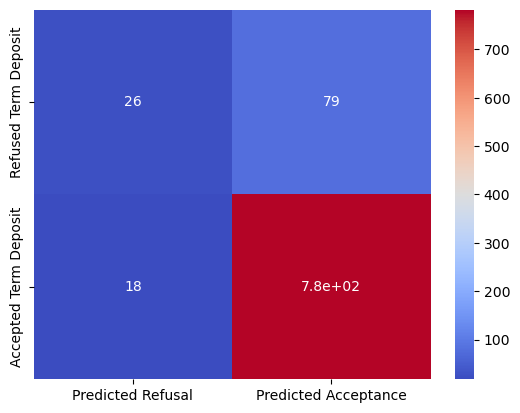

In [94]:
_=sns.heatmap(confusion_df, cmap='coolwarm', annot=True)

In [95]:
# CONFUSION MATRIX EVALUATION METRIC

print("Accuracy:",metrics.accuracy_score(y_test, predictions))
print("Precision:",metrics.precision_score(y_test, predictions))
print("Recall:",metrics.recall_score(y_test, predictions))

Accuracy: 0.8928176795580111
Precision: 0.908246225319396
Recall: 0.9775


In [96]:
# CALCULATE F1 SCORE

metrics.f1_score(y_test,predictions)

0.9416014449127031

In [97]:
# CALCULATE ROC CURVE

from sklearn.metrics import roc_curve, roc_auc_score

In [98]:
probs = logit.predict_proba(X_test)[::,1]

In [99]:
auc = roc_auc_score(y_test_encoded, probs)
print(auc)

0.8510119047619047


In [100]:
fpr, tpr, threshold = roc_curve(y_test_encoded, probs)

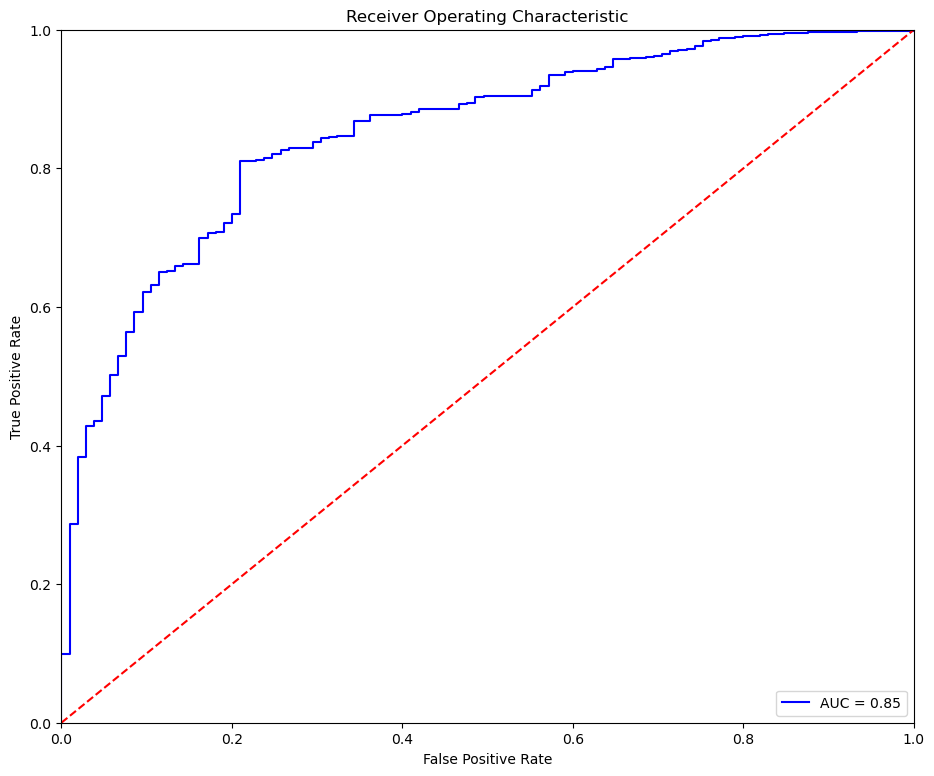

In [101]:
plt.figure(figsize=(11,9))
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [102]:
# CALCULATING THE OPTIMAL THRESHOLD PROBABILITY FROM ROC CURVE


optimal_idx = np.argmax(tpr - fpr)
optimal_threshold = threshold[optimal_idx]
print("Optimal Threshold: ",optimal_threshold)

Optimal Threshold:  0.8687430430155971


## UPDATING THE MODEL BASED ON OPTIMAL THRESHOLD PROBABILITY

In [103]:
new_predictions = np.where(probs>optimal_threshold, 1, 0)

In [104]:
new_confusion_mat = metrics.confusion_matrix(y_test_encoded, new_predictions)

In [105]:
confusion_LR = pd.DataFrame(new_confusion_mat, index=['Refused Term Deposit','Accepted Term Deposit'], columns=['Predicted Refusal','Predicted Acceptance'])
confusion_LR

,Predicted Refusal,Predicted Acceptance
Refused Term Deposit,83,22
Accepted Term Deposit,152,648


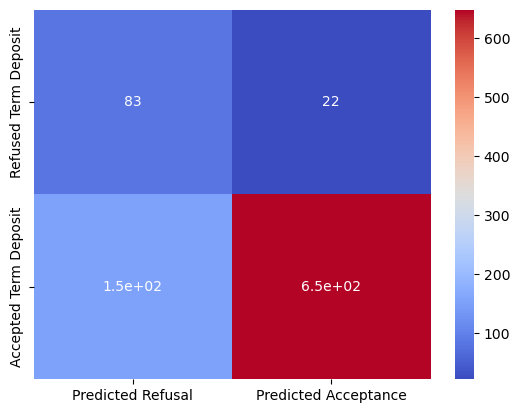

In [106]:
# UPDATED VISUALIZATION OF CONFUSION MATRIX


_=sns.heatmap(confusion_LR, cmap='coolwarm', annot=True)

In [107]:
# CALCULATE THE UPDATED ACCURACY SCORE & LOG LOSS METRICS 

ACS_LR =accuracy_score(y_test, new_predictions)
print("Accuracy Score for LR: ", ACS_LR)

# CALCULATING UPDATED LOG LOSS

LL_LR = metrics.log_loss(y_test, new_predictions)
print("Log Loss for LR: ", LL_LR)

Accuracy Score for LR:  0.8077348066298342
Log Loss for LR:  6.929939988625839


## GRIDSEARCHCV

In [108]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

In [109]:
param_grid = [{"max_depth":[3,4,5,None], "max_features":[2,3,4,5,None]}]

In [110]:
gs = GridSearchCV(estimator=DecisionTreeClassifier(random_state=101),\
                 param_grid = param_grid,\
                 cv=10)

In [111]:
gs.fit(X_train, y_train)

GridSearchCV(cv=10, estimator=DecisionTreeClassifier(random_state=101),
             param_grid=[{'max_depth': [3, 4, 5, None],
                          'max_features': [2, 3, 4, 5, None]}])

In [112]:
gs.cv_results_['params']

[{'max_depth': 3, 'max_features': 2},
 {'max_depth': 3, 'max_features': 3},
 {'max_depth': 3, 'max_features': 4},
 {'max_depth': 3, 'max_features': 5},
 {'max_depth': 3, 'max_features': None},
 {'max_depth': 4, 'max_features': 2},
 {'max_depth': 4, 'max_features': 3},
 {'max_depth': 4, 'max_features': 4},
 {'max_depth': 4, 'max_features': 5},
 {'max_depth': 4, 'max_features': None},
 {'max_depth': 5, 'max_features': 2},
 {'max_depth': 5, 'max_features': 3},
 {'max_depth': 5, 'max_features': 4},
 {'max_depth': 5, 'max_features': 5},
 {'max_depth': 5, 'max_features': None},
 {'max_depth': None, 'max_features': 2},
 {'max_depth': None, 'max_features': 3},
 {'max_depth': None, 'max_features': 4},
 {'max_depth': None, 'max_features': 5},
 {'max_depth': None, 'max_features': None}]

In [113]:
# PRINT BEST HYPERPARAMETERS COMBINATION

gs.best_params_

{'max_depth': 3, 'max_features': None}

In [114]:
gs.cv_results_['rank_test_score']

array([ 9, 12,  7,  4,  1,  8, 11, 13,  6,  2, 10, 14, 15,  5,  3, 20, 18,
       19, 17, 16])

In [115]:
gs.best_estimator_

DecisionTreeClassifier(max_depth=3, random_state=101)

In [116]:
gs_predictions = gs.predict(X_test)

## CONFUSION MATRIX BASED ON GRIDSEARCHCV

In [117]:
confusion_mat_gs = confusion_matrix(y_test, gs_predictions)
confusion_GS = pd.DataFrame(confusion_mat_gs, index=['Refused Term Deposit','Accepted Term Deposit'], columns=['Predicted Refusal','Predicted Acceptance'])

In [118]:
confusion_GS

,Predicted Refusal,Predicted Acceptance
Refused Term Deposit,32,73
Accepted Term Deposit,29,771


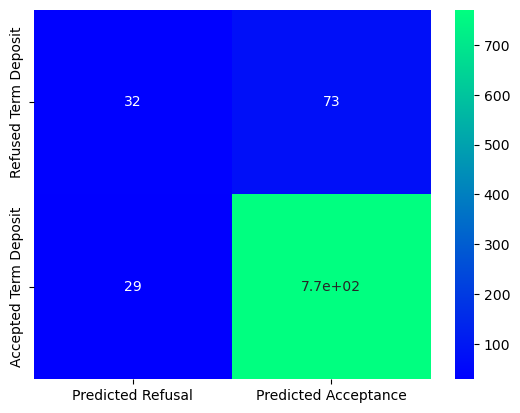

In [119]:
_=sns.heatmap(confusion_GS, cmap="winter", annot=True)

In [120]:
from sklearn.metrics import accuracy_score

In [121]:
ACS_GS=accuracy_score(y_test,gs_predictions)

In [122]:
print("GRIDSEARCHCV ACCURACY SCORE :",ACS_GS)

GRIDSEARCHCV ACCURACY SCORE : 0.887292817679558


##### EXPLANATION OF THE ABOVE

Using GRIDSEARCHCV, we will take the best hyperparameter values of 

max_depth    = 3
max_features = None

Now we will build Decision Tree using above mentioned Hyperparamter values

## DECISION TREE

In [123]:
# SPLITTING THE DATASET INTO TRAIN-TEST

from sklearn.model_selection import train_test_split
X=df_1.drop(['depo_no'],axis=1)
y=df_1['depo_no']

In [124]:
import sklearn.model_selection as model_selection

X_train,X_test,y_train,y_test = model_selection.train_test_split(X,y,test_size=0.2,random_state=101)

# FEATURE SCALING

Feature Scaling: We know our dataset is not yet a scaled value. Therefore, it would be beneficial to scale our data  To do so, we will use Scikit-Learn’s StandardScaler class:

In [125]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()  
X_train = sc.fit_transform(X_train)  
X_test = sc.transform(X_test)

In [126]:
from sklearn.tree import DecisionTreeClassifier

In [127]:
decision_tree = DecisionTreeClassifier(max_depth=5, max_features=None)

In [128]:
decision_tree.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=5)

In [129]:
dt_predictions = decision_tree.predict(X_test)

In [130]:
# CHECKING TOP 5 PREDICTIONS & ACTUAL VALUES 

dt_predictions[:7]

array([1, 1, 1, 1, 1, 1, 1], dtype=uint8)

In [131]:
y_test[:7]

2143    0
3284    1
71      1
1311    1
3274    1
4156    1
2185    1
Name: depo_no, dtype: uint8

In [132]:
# EVALUATING PREDICTION ACCURACY

from sklearn.metrics import accuracy_score, confusion_matrix

In [133]:
ACS_DT =accuracy_score(y_test, dt_predictions)
print("Decision Tree Accuracy Score : ", ACS_DT)

Decision Tree Accuracy Score :  0.881767955801105


In [134]:
# FINDING FEATURE IMPORTANCE

pd.Series(decision_tree.feature_importances_, index=X.columns).sort_values(ascending = False)

duration                  0.455494
pout_success              0.246272
day                       0.055559
mon_jun                   0.050428
contacted_unknown         0.034797
marital_status_married    0.020549
balance                   0.019180
campaign                  0.018340
age                       0.016370
mon_may                   0.013942
mon_mar                   0.013593
mon_oct                   0.013020
quali_unknown             0.010090
work_blue-collar          0.009926
previous                  0.008162
work_technician           0.007496
quali_tertiary            0.006784
work_unknown              0.000000
mon_dec                   0.000000
work_entrepreneur         0.000000
mon_sep                   0.000000
work_housemaid            0.000000
work_management           0.000000
work_retired              0.000000
work_self-employed        0.000000
mon_jul                   0.000000
mon_jan                   0.000000
mon_feb                   0.000000
mon_aug             

### CONFUSION MATRIX BASED ON DECISION TREE

In [135]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [136]:
decision_tree_confusion_mat = confusion_matrix(y_test, dt_predictions)
confusion_DT = pd.DataFrame(decision_tree_confusion_mat, index=['Refused Term Deposit','Accepted Term Deposit'], columns=['Predicted Refusal','Predicted Acceptance'])

In [137]:
confusion_DT

,Predicted Refusal,Predicted Acceptance
Refused Term Deposit,37,68
Accepted Term Deposit,39,761


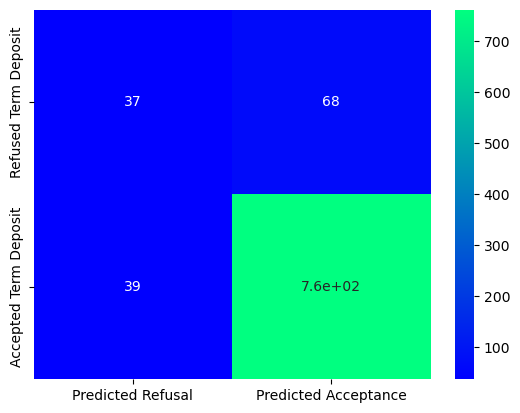

In [138]:
_=sns.heatmap(confusion_DT, cmap="winter", annot=True)

In [139]:
!pip install graphviz

In [140]:
# VISUALIZE THE DECISION TREE OUTUT THROUGH GRAPHVIZ

from sklearn.tree import export_graphviz
import graphviz

In [141]:
dot_data = export_graphviz(decision_tree, filled=True, rounded=True, feature_names=X.columns, out_file=None)
graphviz.Source(dot_data)

ExecutableNotFound: failed to execute WindowsPath('dot'), make sure the Graphviz executables are on your systems' PATH

## RANDOM FOREST CLASSIFIER

In [142]:
from sklearn.ensemble import RandomForestClassifier

In [143]:
rf_model = RandomForestClassifier(n_estimators=500, n_jobs=-1)

In [144]:
rf_model.fit(X_train, y_train)

RandomForestClassifier(n_estimators=500, n_jobs=-1)

In [145]:
from sklearn.metrics import accuracy_score

In [146]:
rf_predictions = rf_model.predict(X_test)

In [147]:
ACS_RF=accuracy_score(y_test, rf_predictions)
print("RANDOM FOREST ACCURACY SCORE : ",ACS_RF)

RANDOM FOREST ACCURACY SCORE :  0.8972375690607735


### CONFUSION MATRIX BASED ON RANDOM FOREST

In [148]:
confusion_mat_rf = confusion_matrix(y_test, rf_predictions)
confusion_RF = pd.DataFrame(confusion_mat_rf, index=['Refused Term Deposit','Accepted Term Deposit'], columns=['Predicted Refusal','Predicted Acceptance'])
confusion_RF

,Predicted Refusal,Predicted Acceptance
Refused Term Deposit,32,73
Accepted Term Deposit,20,780


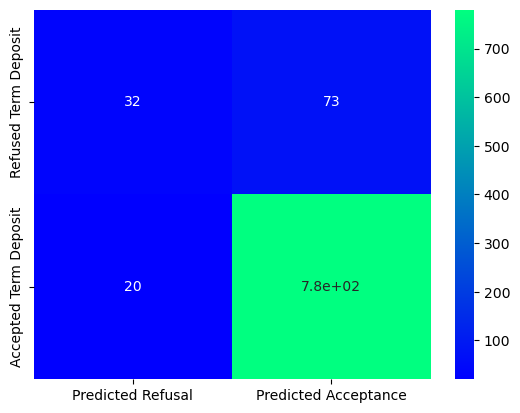

In [149]:
_=sns.heatmap(confusion_RF, cmap="winter", annot=True)

In [150]:
feature_list_RF = []
for Class, score in zip(X.columns, rf_model.feature_importances_):
    feature_list_RF.append((score, Class))

In [151]:
sorted(feature_list_RF, reverse=True)

[(0.2758647173809546, 'duration'),
 (0.09802290673858685, 'balance'),
 (0.09405860001561163, 'age'),
 (0.08768303728893044, 'day'),
 (0.05241499467633819, 'pout_success'),
 (0.042607178330567985, 'campaign'),
 (0.03388710039604001, 'previous'),
 (0.019269634200192738, 'hloan_no'),
 (0.015326915919690674, 'quali_secondary'),
 (0.015053517125980017, 'marital_status_married'),
 (0.014991060837592031, 'mon_oct'),
 (0.014842149477291075, 'mon_jun'),
 (0.014573514951830376, 'quali_tertiary'),
 (0.013800320857403152, 'pout_unknown'),
 (0.012427626375219119, 'contacted_unknown'),
 (0.012364253356250736, 'mon_apr'),
 (0.012172787258362416, 'mon_may'),
 (0.012086395454179093, 'marital_status_single'),
 (0.011939524435022207, 'mon_aug'),
 (0.011904924854541985, 'work_technician'),
 (0.011885164985369541, 'work_management'),
 (0.011241384557977581, 'mon_mar'),
 (0.010643584382485456, 'work_blue-collar'),
 (0.010045772603823458, 'ploan_no'),
 (0.00933459474308481, 'mon_jul'),
 (0.009005398714982949

## ADABOOST ENSEMBLING MODE

In [152]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import accuracy_score
import sklearn.metrics as metrics

In [153]:
model = DecisionTreeClassifier(criterion='gini', max_depth=3)

In [154]:
ada_boost_model = AdaBoostClassifier(base_estimator=model, learning_rate=1.0, n_estimators=500)

In [155]:
boostmodel=ada_boost_model.fit(X_train, y_train)

C:\Users\user\anaconda3\Lib\site-packages\sklearn\ensemble\_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


In [156]:
ada_boost_predictions=boostmodel.predict(X_test)

In [157]:
ACS_ADB=accuracy_score(y_test,ada_boost_predictions)

In [158]:
print("ADABOOST ACCURACY SCORE : ",ACS_ADB)

ADABOOST ACCURACY SCORE :  0.8784530386740331


In [159]:
feature_list_ADB = []
for Class, score in zip(X.columns, ada_boost_model.feature_importances_):
    feature_list_ADB.append((score, Class))

In [160]:
sorted(feature_list_ADB, reverse=True)

[(0.21643736783040032, 'duration'),
 (0.20322202144664805, 'balance'),
 (0.11789803953858242, 'age'),
 (0.11615393158067198, 'day'),
 (0.044743139516138855, 'campaign'),
 (0.03545843571422117, 'previous'),
 (0.017960065061258974, 'contacted_unknown'),
 (0.01488984378042163, 'mon_apr'),
 (0.014053414066975332, 'mon_may'),
 (0.013177610606818596, 'mon_oct'),
 (0.012097174320126785, 'work_technician'),
 (0.011560072006714167, 'mon_aug'),
 (0.011490872734475686, 'work_blue-collar'),
 (0.010802285074107272, 'hloan_no'),
 (0.010456724528074527, 'mon_feb'),
 (0.010065977764470616, 'quali_secondary'),
 (0.010063198141066305, 'work_management'),
 (0.009996253548967075, 'ploan_no'),
 (0.00955566008130478, 'contacted_telephone'),
 (0.009423521454627153, 'mon_jun'),
 (0.009413929289115022, 'pout_success'),
 (0.008545200900160047, 'mon_jul'),
 (0.008261418747596772, 'pout_unknown'),
 (0.0081922667152571, 'work_services'),
 (0.0079192663855244, 'work_entrepreneur'),
 (0.007900642180647545, 'marital_

### CONFUSION MATRIX BASED ON ADABOOST


In [161]:
confusion_mat_ada_boost = confusion_matrix(y_test, ada_boost_predictions)
confusion_ADB = pd.DataFrame(confusion_mat_ada_boost, index=['Refused Term Deposit','Accepted Term Deposit'], columns=['Predicted Refusal','Predicted Acceptance'])
confusion_ADB

,Predicted Refusal,Predicted Acceptance
Refused Term Deposit,40,65
Accepted Term Deposit,45,755


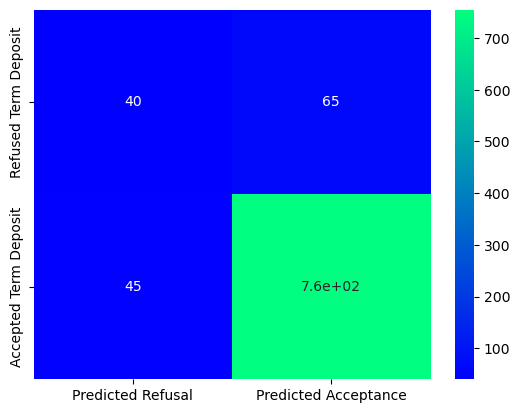

In [162]:
_=sns.heatmap(confusion_ADB, cmap="winter", annot=True)

## VOTING CLASSFIER

In [163]:
# IMPORTING NECESSARY LIBRARIES

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import VotingClassifier

In [164]:
v_log_model = LogisticRegression()
v_gs_model = GridSearchCV(estimator=DecisionTreeClassifier(random_state=101), param_grid = param_grid, cv=10)
v_dtree_model = DecisionTreeClassifier()
v_rf_model = RandomForestClassifier()

In [165]:
ensemble = VotingClassifier(estimators=[('V_LR', v_log_model), ('V_GS',v_gs_model),('V_DT', v_dtree_model),('V_RF', v_rf_model)], voting='hard')

In [166]:
ensemble.fit(X_train, y_train)

VotingClassifier(estimators=[('V_LR', LogisticRegression()),
                             ('V_GS',
                              GridSearchCV(cv=10,
                                           estimator=DecisionTreeClassifier(random_state=101),
                                           param_grid=[{'max_depth': [3, 4, 5,
                                                                      None],
                                                        'max_features': [2, 3,
                                                                         4, 5,
                                                                         None]}])),
                             ('V_DT', DecisionTreeClassifier()),
                             ('V_RF', RandomForestClassifier())])

In [167]:
from sklearn.metrics import accuracy_score

In [168]:
for model in (v_log_model, v_gs_model, v_dtree_model, v_rf_model, ensemble):
    model.fit(X_train, y_train)
    v_predictions = model.predict(X_test)
    print(model.__class__.__name__, accuracy_score(y_test, v_predictions))

LogisticRegression 0.8928176795580111
GridSearchCV 0.887292817679558
DecisionTreeClassifier 0.8685082872928177
RandomForestClassifier 0.8983425414364641
VotingClassifier 0.8906077348066298


In [169]:
ACS_V=accuracy_score(y_test, v_predictions)
print(ACS_V)

0.8906077348066298


### CONFUSION MATRIX BASED ON VOTING CLASSIFIER

In [170]:
confusion_mat_V= confusion_matrix(y_test, v_predictions)
confusion_V = pd.DataFrame(confusion_mat_V, index=['Refused Term Deposit','Accepted Term Deposit'], columns=['Predicted Refusal','Predicted Acceptance'])
confusion_V

,Predicted Refusal,Predicted Acceptance
Refused Term Deposit,37,68
Accepted Term Deposit,31,769


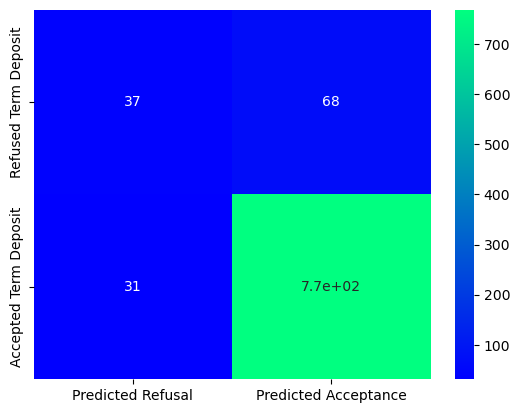

In [171]:
_=sns.heatmap(confusion_V, cmap="winter", annot=True)

### COMPARISON OF ML MODEL BASED CONFUSION MATRIX

In [172]:
print('LR',confusion_LR,"\n")   # Logistic Regression
print('GS',confusion_GS,"\n")   # GridSearchCV
print('DT',confusion_DT,"\n")   # Decision Tree
print('RF',confusion_RF,"\n")   # Random Forest
print('ADB',confusion_ADB,"\n") # Ada Boost
print('VC',confusion_V,"\n")    # Voting Classifier

LR                        Predicted Refusal  Predicted Acceptance
Refused Term Deposit                  83                    22
Accepted Term Deposit                152                   648 

GS                        Predicted Refusal  Predicted Acceptance
Refused Term Deposit                  32                    73
Accepted Term Deposit                 29                   771 

DT                        Predicted Refusal  Predicted Acceptance
Refused Term Deposit                  37                    68
Accepted Term Deposit                 39                   761 

RF                        Predicted Refusal  Predicted Acceptance
Refused Term Deposit                  32                    73
Accepted Term Deposit                 20                   780 

ADB                        Predicted Refusal  Predicted Acceptance
Refused Term Deposit                  40                    65
Accepted Term Deposit                 45                   755 

VC                        Pre

Based on Confusion Matrix we can conclude that the Random Forest model was the best model as it is having the least number of misclassified observations from test set.

Only 308 observation were misclassified.`

## COMPARISON OF ML MODEL BASED ACCURACY SCORE VALUES

In [173]:
ACS_FINAL= pd.DataFrame(columns=['Model_Name', 'Accuracy_Score'])

In [174]:
ACS_FINAL['Accuracy_Score']=[ACS_LR, ACS_GS, ACS_DT, ACS_RF, ACS_ADB, ACS_V]

In [175]:
ACS_FINAL['Model_Name']=['LogisticRegression', 'GridSearchCV', 'Decision_Tree', 'RandomForest', 'Ada Boost', \
                         'Voting CLassifier']

In [176]:
def highlight_max(s):
    is_max = s == s.max()
    return ['background-color: yellow' if v else '' for v in is_max]

In [177]:
ACS_FINAL[['Model_Name', 'Accuracy_Score']].sort_values('Accuracy_Score', ascending=False)\
.style.apply(highlight_max, subset=['Accuracy_Score'])

,Model_Name,Accuracy_Score
3,RandomForest,0.897238
5,Voting CLassifier,0.890608
1,GridSearchCV,0.887293
2,Decision_Tree,0.881768
4,Ada Boost,0.878453
0,LogisticRegression,0.807735


Based on acs values we can conclude that the Random Forest model was the best model as it is having the best accuracy score value of 0.8620689655172413

### CONCLUSION 1: ML MODEL SELECTION
We are selecting our final ML model based on the Accuracy_Score values. As seen above in our case the Random Forest model has the best Accuracy_Score value of 0.8629646215853113. Therefore, going forward to determine our Business Solution we will use Random Forest as our final ML model.

In order to make any actionable recommendations, we must look upon the feature importances based on our selected model i.e. Random Forest model.

In [178]:
# RECALLING THE FEATURE IMPORTANCE LIST

sorted(feature_list_RF, reverse=True)

[(0.2758647173809546, 'duration'),
 (0.09802290673858685, 'balance'),
 (0.09405860001561163, 'age'),
 (0.08768303728893044, 'day'),
 (0.05241499467633819, 'pout_success'),
 (0.042607178330567985, 'campaign'),
 (0.03388710039604001, 'previous'),
 (0.019269634200192738, 'hloan_no'),
 (0.015326915919690674, 'quali_secondary'),
 (0.015053517125980017, 'marital_status_married'),
 (0.014991060837592031, 'mon_oct'),
 (0.014842149477291075, 'mon_jun'),
 (0.014573514951830376, 'quali_tertiary'),
 (0.013800320857403152, 'pout_unknown'),
 (0.012427626375219119, 'contacted_unknown'),
 (0.012364253356250736, 'mon_apr'),
 (0.012172787258362416, 'mon_may'),
 (0.012086395454179093, 'marital_status_single'),
 (0.011939524435022207, 'mon_aug'),
 (0.011904924854541985, 'work_technician'),
 (0.011885164985369541, 'work_management'),
 (0.011241384557977581, 'mon_mar'),
 (0.010643584382485456, 'work_blue-collar'),
 (0.010045772603823458, 'ploan_no'),
 (0.00933459474308481, 'mon_jul'),
 (0.009005398714982949

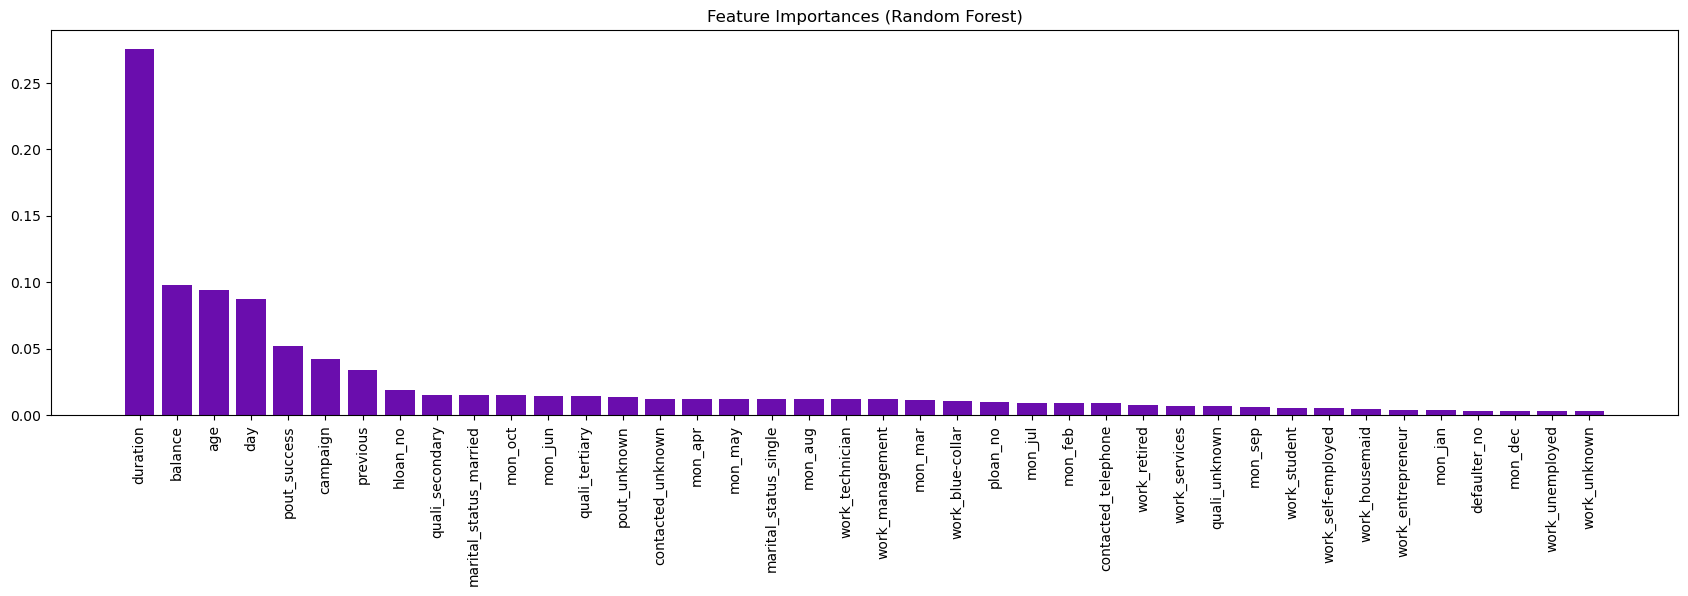

In [179]:
# PLOTTING FEATURES IMPORTANCES

plt.figure(figsize=(21,5))

FI_RF = pd.DataFrame(sorted(zip(X.columns, rf_model.feature_importances_), \
                            key=lambda x: x[1], reverse= True), columns = ["Features", "Score"])

index = np.arange(len(FI_RF))
plt.bar(index, FI_RF['Score'], color = '#6a0dad')
plt.xticks(index, FI_RF['Features'], rotation=90)
plt.title('Feature Importances (Random Forest)')

plt.show()

As we can see from the above shown barplot representing the feature importances. It is evident that the top 4 most important features are:

1) Duration  : Last contact duration in seconds made with the customer.
2) Balance   : Customer Balance Amount with the bank.
3) Age       : Age of the customer.
4) Day       : Last contacted day of the week 

#### CONCLUSION 2: BUSINESS SOLUTION
Based on above mentioned features we can conclude the following:

1) The amount of time spent with the customer is important. Too much or too little could be a reason for refusal. 
2) Customers with higher account balance are more acceptable to opt for a term deposit.
3) Older customers are more acceptable to opt for a term deposit.
4) The day of the week a customer is approached is also significant.
Now let's try to be more specific with our suggestions

In [180]:
# CREATING A COPY OF THE CLEANED DATA (DF_1)

df_2 = df_1.copy()

In [181]:
# CREATING A NEW COLUMN (CONTACT_DURATION)

df_2['contact_duration'] = pd.qcut(df_2['duration'], q=10, labels=False, duplicates = 'drop')

In [182]:
#GROUPING THE 'CONTACT_DURATION' AND FINDING AVERAGE CONTACT DURATION
mean_contact_duration = df_2.groupby(['contact_duration'])['depo_no'].mean()

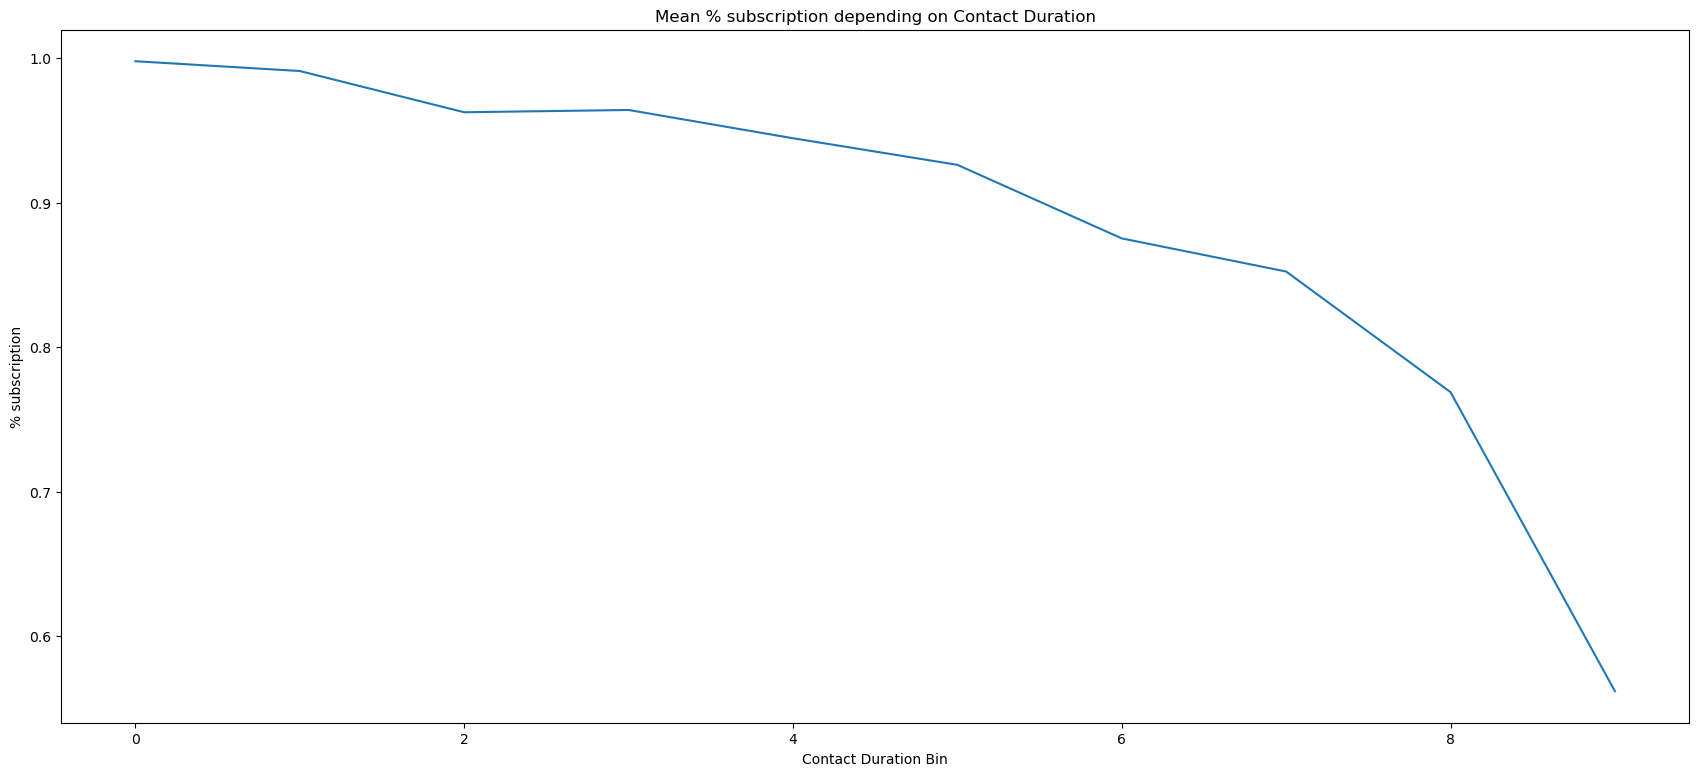

In [183]:
# PLOTTING THE MEAN % SUBSCRIPTION VS CONTACT DURATION
plt.figure(figsize=(21,9))
plt.plot(mean_contact_duration.index, mean_contact_duration.values)
plt.title('Mean % subscription depending on Contact Duration')
plt.xlabel('Contact Duration Bin')
plt.ylabel('% subscription')
plt.show()

In [184]:
df_2[df_2['contact_duration'] == 4]['duration'].max()

185

In [185]:
df_2[df_2['contact_duration'] == 6]['duration'].min()

227

A1) From the above graph we can say that the average duration of time (in seconds) a customer should be contacted for must lie between 255 to 324 seconds(4-6 mins). Hence the campaign should have a sales pitch which does not exceed these limits.

Q2) The account balance of a customer who should be contacted?

In [186]:
df_2['cust_bal'] = pd.qcut(df_2['balance'], q=50, labels=False, duplicates = 'drop')

In [187]:
mean_cust_bal = df_2.groupby(['cust_bal'])['depo_no'].mean()

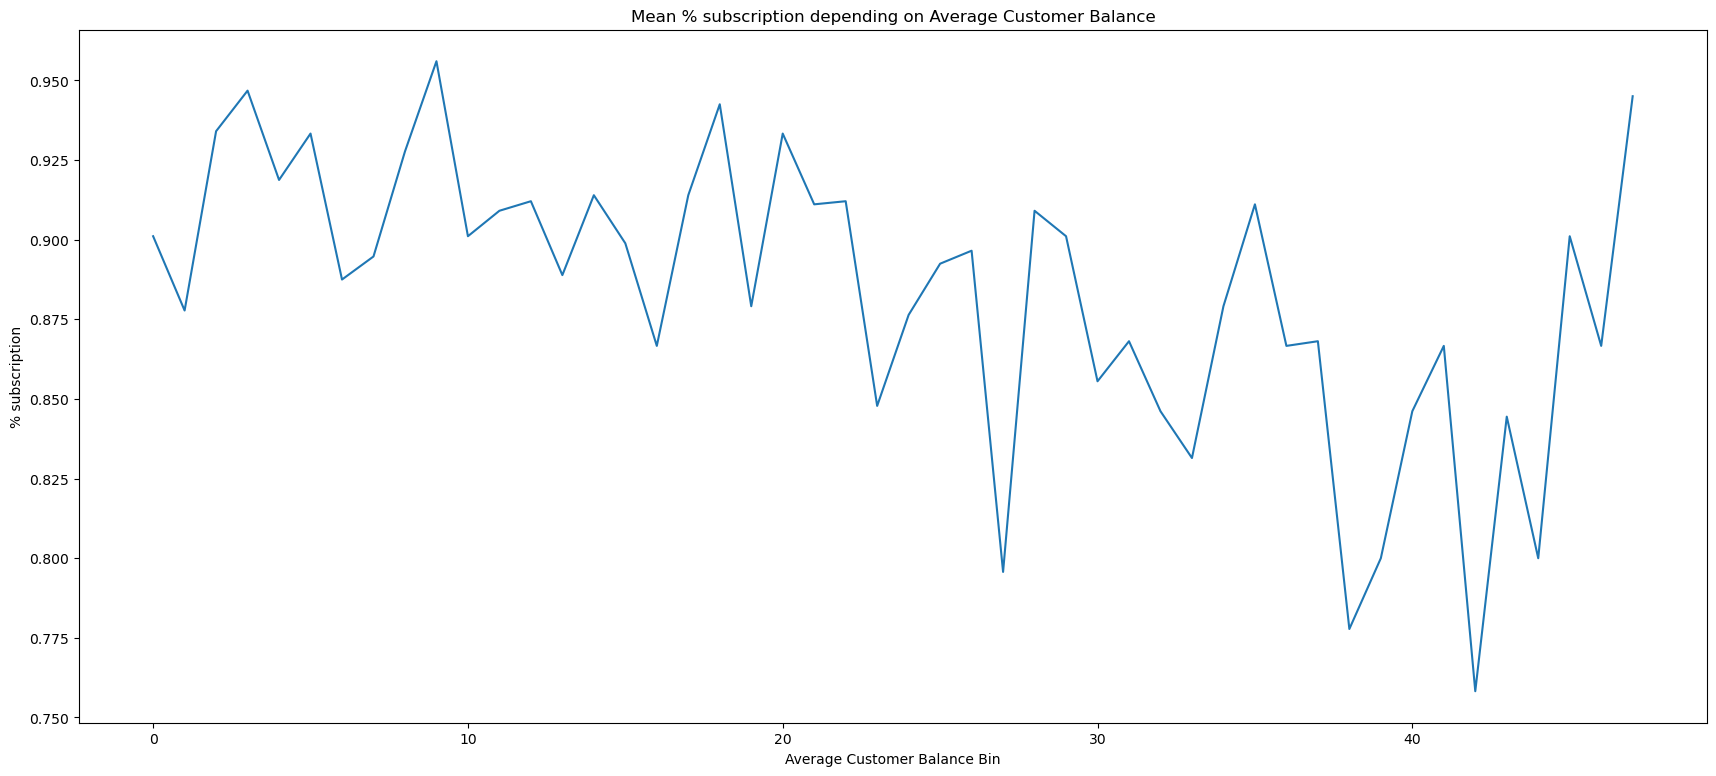

In [188]:
# PLOTTING THE MEAN % SUBSCRIPTION VS AVERAGE CUSTOMER BALANCE
plt.figure(figsize=(21,9))
plt.plot(mean_cust_bal.index, mean_cust_bal.values)
plt.title('Mean % subscription depending on Average Customer Balance')
plt.xlabel('Average Customer Balance Bin')
plt.ylabel('% subscription')
plt.show()

In [189]:
# CREATING A NEW COLUMN (CUST_AGE)

df_2['cust_age'] = pd.qcut(df_2['age'], q=10, labels=False, duplicates = 'drop')

In [190]:
#GROUPING THE 'CUST_BAL' AND FINDING AVERAGE CUSTOMER BALANCE

mean_cust_age= df_2.groupby(['cust_age'])['depo_no'].mean()

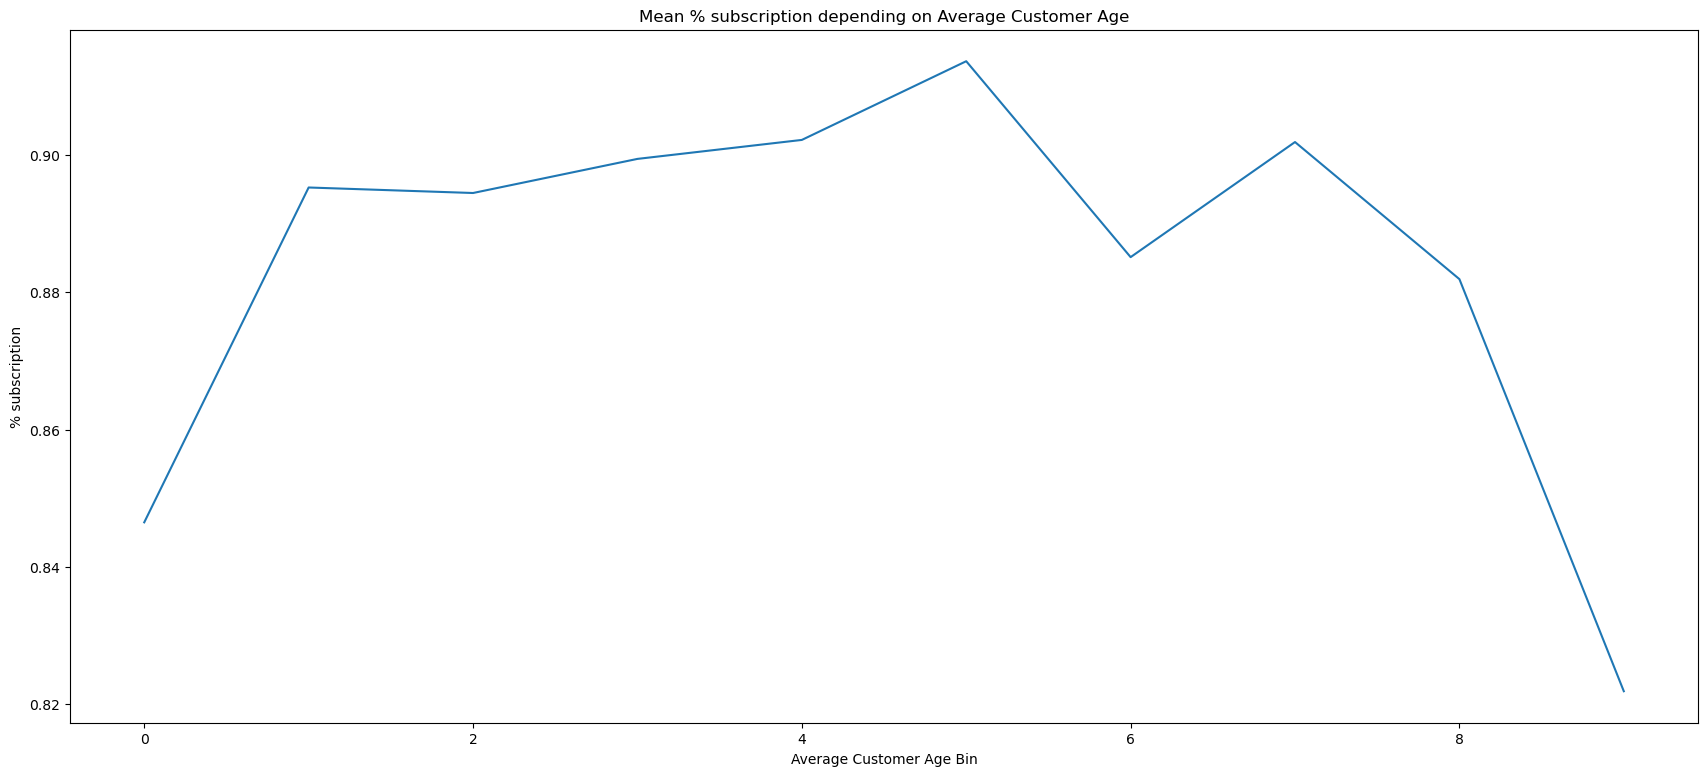

In [191]:
# PLOTTING THE MEAN % SUBSCRIPTION VS AVERAGE CUSTOMER BALANCE
plt.figure(figsize=(21,9))
plt.plot(mean_cust_age.index, mean_cust_age.values)
plt.title('Mean % subscription depending on Average Customer Age')
plt.xlabel('Average Customer Age Bin')
plt.ylabel('% subscription')
plt.show()

In [192]:
df_2[df_2['cust_age'] == 1]['age'].max()

32

In [193]:
df_2[df_2['cust_age'] == 8]['age'].min()

52

A3) From the above graph we can say that the average age of a customer to be approached for should be less than 31 or higher than 53. These customers are more likely to go for a term deposit.

The marketing campaign should avoid focusing on age groups between 31 & 53.

Q4) The day of the month a customer should be approached?

In [194]:
# CREATING A NEW COLUMN (APPROACH DAY)

df_2['app_day'] = pd.qcut(df_2['day'], q=4, labels=False, duplicates = 'drop')

In [195]:
#GROUPING THE 'CUST_BAL' AND FINDING AVERAGE CUSTOMER BALANCE

mean_app_day = df_2.groupby(['app_day'])['depo_no'].mean()

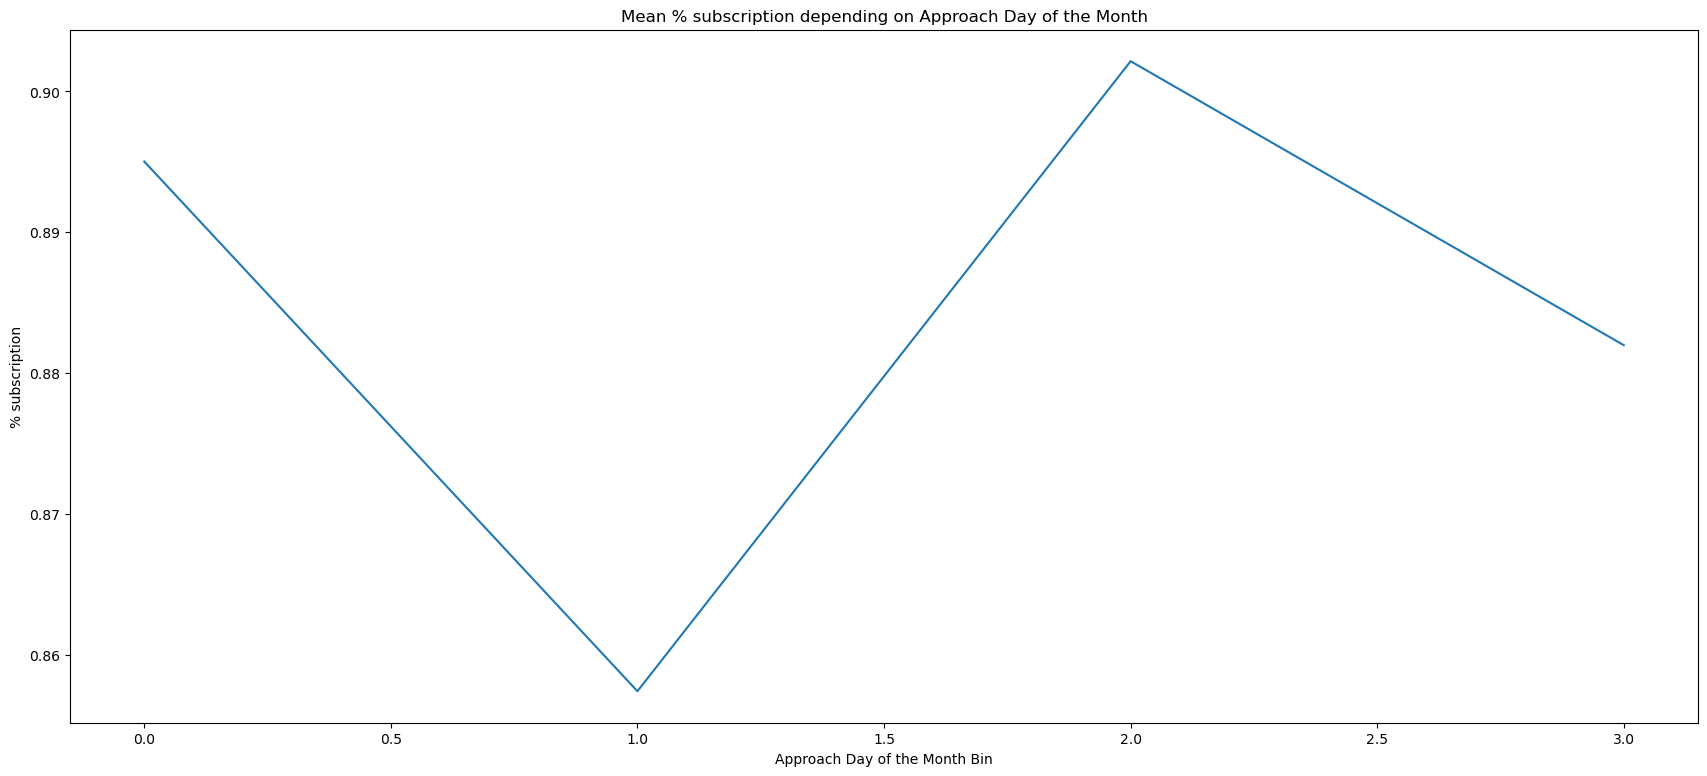

In [196]:
# PLOTTING THE MEAN % SUBSCRIPTION VS AVERAGE CUSTOMER BALANCE
plt.figure(figsize=(21,9))
plt.plot(mean_app_day.index, mean_app_day.values)
plt.title('Mean % subscription depending on Approach Day of the Month')
plt.xlabel('Approach Day of the Month Bin')
plt.ylabel('% subscription')
plt.show()

In [197]:
#GROUPING THE 'CUST_BAL' AND FINDING AVERAGE CUSTOMER BALANCE

mean_app_day = df_2.groupby(['app_day'])['depo_no'].mean()

In [198]:
df_2[df_2['app_day'] == 3]['day'].min()

22

A4) From the above graph we can say that if the customer is approached, before the 8th of the month or after the 23rd of the month, the likelyhood for a term deposit are high.

The marketing campaign should avoid focusing between 9th & 22nd of the month.

# FINAL SUMMARY
Key outcomes of the analysis are the recommendations for future marketing campaigns:

1) Sales pitch of the campaign should be 4mins to 6 mins long.
2) Customers having account balance north of $935 should be focus group.
3) Customers having age groups between 31 & 53 should'nt be the focus group.
4) Customers are more willing to invest either before 8th or after 23rd of the month.

One challenge encountered during the analysis was the presence of outliers in the data. Outliers can significantly impact the results of statistical analyses and machine learning models. To address this challenge, techniques such as outlier detection and removal were employed. For numerical features like account balance and duration, statistical methods like z-score or interquartile range (IQR) were used to identify and remove outliers.

Another challenge was dealing with missing or inconsistent data. Missing data can lead to biased analyses and inaccurate conclusions. Techniques such as imputation, where missing values are replaced with estimated values, were used to handle missing data. Additionally, data cleaning procedures were implemented to address inconsistencies and errors in the dataset.

Furthermore, ensuring the relevance and reliability of the data was crucial. This involved thorough data validation and verification processes to ensure that the data accurately represented the target population and was collected using reliable methods.

Overall, employing a combination of data preprocessing techniques and rigorous validation processes helped mitigate these challenges and ensure the integrity of the analysis results.